# Imports 

In [1]:
%matplotlib inline
from data_helper import *
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from Spider.facebook_crawler import FacebookSpider

# Loading Datasets

In [2]:
split = 0.7
df = get_data_frame()
Tr, Te = load_train_test(df, split)

X_train = Tr[0]
y_train = Tr[1]
X_test = Te[0]
y_test = Te[1]

X_train length: 8163
 y_train length: 8163
 X_test_length: 3499
 y_test_length: 3499



# Vectorizing Text data

In [3]:
cv = CountVectorizer()

cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

# Fitting data to SVM Classifier

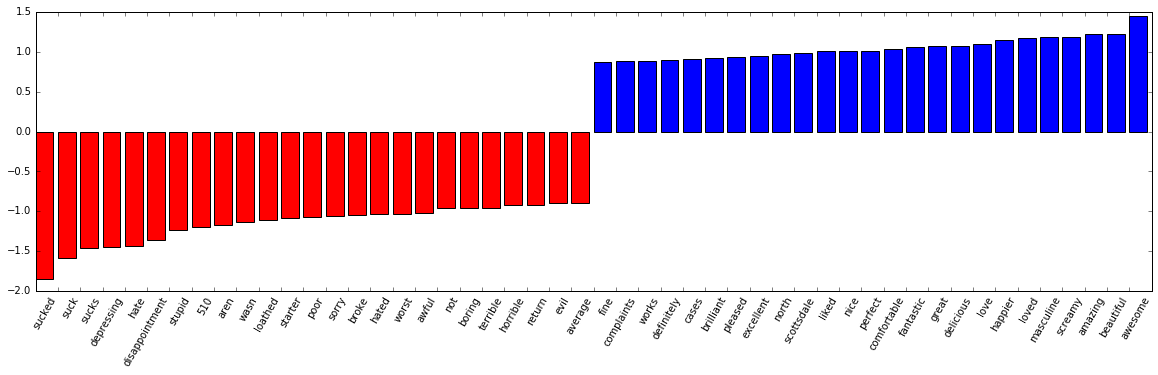

In [4]:
svm = LinearSVC()
svm.fit(X_train, y_train)
visualize_data(svm, cv.get_feature_names(), n_top_features=25)

# Performance Metrics of SVM

## Accuracy on Training Set

In [5]:
print(svm.score(X_train, y_train))

0.999264976112


## Accuracy on Testing Set

In [6]:
print(svm.score(X_test, y_test))

0.909402686482


## Confusion Matrix

Confusion matrix, without normalization
[[1394  163]
 [ 154 1788]]
Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.08  0.92]]


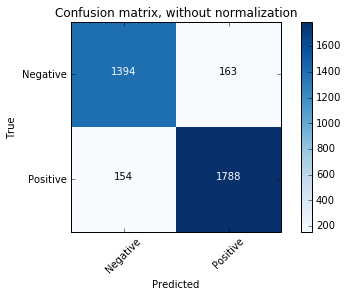

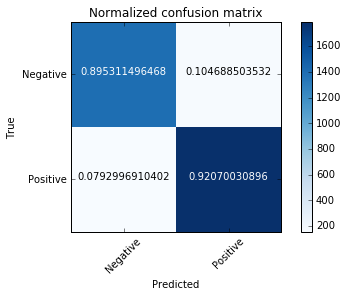

In [7]:
prediction = svm.predict(X_test)

# Class names
class_names = ['Negative', 'Positive']

# Compute confusion matrix
cnf_matrix = confusion_matrix(prediction, y_test)

## Reference:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Fitting Data to Multinomial Naive Bayes Classifier

In [8]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print("MNB Accuracy on Training Set: {0}".format(mnb.score(X_train, y_train)))
print("MNB Accuracy on Testing Set: {0}".format(mnb.score(X_test, y_test)))

MNB Accuracy on Training Set: 0.9462207521744457
MNB Accuracy on Testing Set: 0.891683338096599


# Status scraping from the homepage of Donald Trump

In [9]:
def get_status(username, password, scrolls, webdriver_path, profile='DonaldTrump', debug=False):
    fs = FacebookSpider(username, password)
    fs.set_webdriver_path(webdriver_path)
    fs.set_scroll_count(scrolls)
    fs.set_profile_to_scrape(profile)
    fs.set_delay_between_scroll(1)
    urls = fs.extract_post_urls()

    if debug:
        print(urls)
    txt = fs.extract_text(urls)

    if debug:
        print(txt)

    return txt

In [ ]:
# If you want to collect status by yourself then run this block
username = input('Enter username: ')
password = input('Enter password: ')
prof = input('Enter the profile to scrape: ')
webdriverpath = input('Enter the path of your Chrome Driver: ')
numberofscrolls = input('Enter number of scrolls: ')


status_updates = get_status(username, password, int(numberofscrolls), str(webdriverpath) , profile=str(prof), debug=True)

In [10]:
# if you don't then run this block
status_updates = ['JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'I would like to wish everyone who is observing the solemn and holy day of Yom Kippur an inspirational day of reflection. We hope that everyone’s prayers are answered and that we all have a year of peace, security, good health, prosperity and blessings.  -DJT', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'I would like to wish everyone who is observing the solemn and holy day of Yom Kippur an inspirational day of reflection. We hope that everyone’s prayers are answered and that we all have a year of peace, security, good health, prosperity and blessings.  -DJT', 'Great morning in San Antonio, Texas - GREAT afternoon in Dallas, Texas. Departing now for Florida! #ImWithYou', 'THANK YOU TEXAS --- AND THANK YOU TO OUR LAW ENFORCEMENT OFFICERS. #ImWithYou #AmericaFirst', 'Wow. Unbelievable.', "DON'T LET HER FOOL US AGAIN. #DangerousHillary", 'Despite winning the second debate in a landslide (every poll), it is hard to do well when Paul Ryan and others give zero support!', 'The mainstream media (MSM) are trying to rig this election in order to advance their liberal, far left agenda for another 4 years and beyond.  Crooked Hillary Clinton has been the mouthpiece for the corrupt Washington DC system that the MSM keeps alive through direct propaganda and support.  It is time we bring CHANGE to the White House, defeat the rigged system, and Make America Great Again!', 'Thank you Pennsylvania. This is a MOVEMENT like we have never seen before! Get out and VOTE on 11/8/16- together, we will #MAGA!', "A big thank you to these incredible women for their support! I have the BEST supporters and believe me, if I'm elected, I will ALWAYS be your voice.", 'Stopped by Smiley Cookie to pick up some great cookies for the family, along with Rudy.', 'Just arrived in Pennsylvania!', 'Debate polls look great - THANK YOU, AMERICA!', 'Paul Ryan should spend more time on balancing the budget, jobs and illegal immigration and not waste his time on fighting Republican nominee.', 'Thank you Rudy! -DJT', 'Frank Luntz: Tonight Was So Significant That Trump ‘Is Back in This Race’', 'Thank you St. Louis, Missouri!', 'All of the moderator interruptions--it was 3 vs 1! https://www.donaldjtrump.com/…/heres-video-of-every-time-t…/', 'Even the Rigged Mainstream Media Says Donald Trump Won The Debate. Here’s The Proof.', 'Donald Trump’s Top 5 Moments from the Presidential Debate', 'Thank you Mark Levin!', '"It\'s a good thing Trump isn\'t in charge of the law in this country." -Hillary Clinton "Yeah, because you\'d be in jail." -Donald Trump', 'Once again, the media shows its true colors -- I was supposed to be debating #CrookedHillary, NOT Martha, NOT Anderson, #CrookedHillary. We STILL won -- BIG LEAGUE!', 'I will be a President for ALL! #MakeAmericaGreatAgain', '#CrookedHillary wants to KILL the coal companies! We must PROTECT our coal companies!', '#CrookedHillary wants to "change the balance on the Supreme Court." 2nd Amendment supporters know what that means...', '#CrookedHillary has been a Washington, DC insider for 30 years! We need a change and I will be the one to #MakeAmericaGreatAgain and fight for YOU, not the insiders!', 'We cannot afford four more years of these FAILED policies!', '#CrookedHillary is going to RAISE taxes, I will LOWER them!', 'History lesson: #CrookedHillary blames her two-faced stance on Wall Street on — get this — Abraham Lincoln!', 'History lesson: There’s a big difference between Hillary Clinton and Abraham Lincoln. For one, his nickname is Honest Abe.', 'I hope when the MSM runs its “interruption counters” they consider the number of times the moderators interrupted me compared to #CrookedHillary!', 'I stand for ALL Americans and we will #MakeAmericaSafeAgain and defeat radical Islamic terrorism!', 'There has never been so many lies and so much deception. A special prosecutor will look into #CrookedHillary!', 'Because #CrookedHillary would be in JAIL!', "If I win- I am going to instruct my AG to get a special prosecutor to look into your situation bc there's never been anything like your lies.", 'I am running for YOU. I am running to #MakeAmericaGreatAgain because AMERICANS have had ENOUGH!', "Unlike #CrookedHillary, I will SAVE American jobs and SAVE Americans' futures! #MakeAmericaGreatAgain", 'TIME TO MAKE AMERICA GREAT AGAIN!', 'My plan begins at home. I will #MakeAmericaSafeAgain!', 'I AM WITH YOU!', "I am ready to fight for YOU, America! Let's #MakeAmericaGreatAgain!", 'Join Newt Gingrich via Facebook Live! -DJT', 'Join me in St. Louis, Missouri - as I conclude my debate prep.', 'The Palestinian terror attack today reminds the world of the grievous perils facing Israeli citizens. In a split second today, the streets of Jerusalem, Israel turned calamitous, shattered by gunfire as a Palestinian motorist trained his sights on Jews, killing two and wounding six others.  It marks yet another in a string of terrorist incidents targeting Israeli civilians in 2016. Palestinian Authority President Mahmoud Abbas’ recent attendance at the funeral of Shimon Peres, the late Israeli president and prime minister, should have marked a new chapter in Israeli-Palestinian relations. Instead, the streets of Jerusalem tragically flow once more with the blood of innocents.  Our thoughts and prayers go out to the survivors and the families of the victims. We must work to defeat terror once and for all. I wish everyone in Israel and the Jewish community around the world a meaningful Yom Kippur and peace.  Donald J. Trump', "Clinton News Network Telegraphs Its Anti-Trump Strategy for Tonight's Rigged Presidential Debate:", 'In the debate hall - at Washington University in St. Louis - doing a walk thru with my team -- and the Presidential Debate Commission. Thank you for all of your support! -DJT', "EXCLUSIVE VIDEO: BROADDRICK, WILLEY, JONES TO BILL CLINTON'S DEFENDERS: 'THESE ARE CRIMES,' 'TERRIFIED' OF 'ENABLER' HILLARY CLINTON:", 'So many self-righteous hypocrites. Watch their poll numbers - and elections - go down!', 'Departing New York City for St. Louis now. Your support has been amazing - thank you. TOGETHER, WE are going to MAKE AMERICA SAFE AND GREAT AGAIN! -DJT', 'EXCLUSIVE — Video Interview: Bill Clinton Accuser Juanita Broaddrick Relives Brutal Rapes:', 'Tremendous support (except for some Republican "leadership"). Thank you.', 'Thank you to my amazing supporters outside of Trump Tower this afternoon. #ImWithYou', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'The media and establishment want me out of the race so badly -  I WILL NEVER DROP OUT OF THE RACE, WILL NEVER LET MY SUPPORTERS DOWN!', 'Here is my statement. I’ve never said I’m a perfect person, nor pretended to be someone that I’m not.  I’ve said and done things I regret, and the words released today on this more than a decade-old video are one of them.  Anyone who knows me, know these words don’t reflect who I am. I said it, it was wrong, and I apologize. I’ve travelled the country talking about change for America. But my travels have also changed me.  I’ve spent time with grieving mothers who’ve lost their children, laid off workers whose jobs have gone to other countries, and people from all walks of life who just want a better future. I have gotten to know the great people of our country, and I’ve been humbled by the faith they’ve placed in me. I pledge to be a better man tomorrow, and will never, ever let you down. Let’s be honest.  We’re living in the real world.  This is nothing more than a distraction from the important issues we are facing today.  We are losing our jobs, we are less safe than we were 8 years ago and Washington is broken. Hillary Clinton, and her kind, have run our country into the ground. I’ve said some foolish things, but there is a big difference between words and actions. Bill Clinton has actually abused women and Hillary has bullied, attacked, shamed and intimidated his victims. We will discuss this more in the coming days. See you at the debate on Sunday.', 'My team and I continue to have our thoughts & prayers with everyone effected by Hurricane Matthew. Check in on your family, friends, and neighbors -- and listen to local officials.', 'The spirit is amazing --- thank you to this homeowner in Florida for their support.', 'Crooked\'s performance as Secretary of State was even worse than Tim Kaine\'s performance in the debate! No more "DREAM DEALS" for our enemies. Believe me -- we WILL be TOUGH. #BigLeagueTruth', "#FlashbackFriday Senator Tim Kaine squirms when asked if he'd endorse Hillary Clinton", 'This is an incredible MOVEMENT - On November 8th, we have one magnificent chance to take our country BACK! We WILL #MakeAmericaGreatAgain! #ImWithYou', 'Thoughts & prayers with the millions of people in the path of Hurricane Matthew. Look out for neighbors, and listen to your local officials.', "We're going to have a country that makes products again...these great companies are going to make their products in OUR country. #TrumpNHTownHall", "If it weren't for our GREAT VETERANS---- we wouldn't be here right now!! #TrumpNHTownHall", 'My son Eric & his wife Lara campaigning up in Maine - to MAKE AMERICA GREAT AGAIN! Thank you Eric, Lara, and MAINE!', 'My son Donald Trump Jr. campaigning in OHIO! Thank you Don -- and OHIO!!', 'VOTE #TrumpPence16 on 11/8/16!', 'Ivanka out in Ohio today! I am so grateful for my families support -- in wanting to MAKE AMERICA GREAT AGAIN, with all of you --- the AMERICAN PEOPLE! -DJT', 'Thank you Missouri - my team just shared with me! LETS MAKE AMERICA SAFE & GREAT AGAIN! -DJT', 'Wow – my #BigLeagueTruth team did an incredible job spreading the TRUTH about Crooked Hillary on Tuesday! We only have 3 DAYS until the next debate. Sign up for #BigLeagueTruth so we can fact check Hillary and take down the rigged system! bigleaguetruth.com.  http://dailycaller.com/…/exclusive-trumps-bigleaguetruth-t…/', 'I want to see America PROSPEROUS again – that means tax cuts for working families, and lower taxes for small businesses so owners can create more jobs! America will WIN – everyone will succeed and we will have a strong, thriving economy once again! #ImWithYou', "Nation's Immigration And Customs Enforcement Officers (ICE) Make First-Ever Presidential Endorsement:", 'WE have taken the lead in Virginia! Thank you for your unbelievable support. This is OUR last chance - to take back our country -- and MAKE IT SAFE & GREAT AGAIN! -DJT', '25,000 Parents, Children In New York March For Charter Schools: School choice is the great civil rights issue of our time. I am committed to providing every low-income child in America with the ability to choose the private, public, charter, magnet or religious school that is best for them and their families. My opponent wants to keep children trapped in failing government schools. This is one of the very biggest differences in this race! -DJT', "NEW Pennsylvania poll out - - thank you! See you on Monday for two rallies, PA. Tickets available at www.DonaldJTrump.com - under 'schedule.' -DJT", 'Amazing rally in Reno, Nevada- thank you. Make sure you get out on 11/8 & VOTE #TrumpPence16. Together, we will put AMERICA FIRST - and MAKE AMERICA GREAT AGAIN!', 'NOW IN RENO, NEVADA with the MOVEMENT! Join us for a couple of minutes!', 'Great round table discussion with Hispanic business owners this afternoon in Las Vegas, Nevada. Now off to Reno, Nevada for second massive rally of day!', "'Small business says Trump is their pick for president'", "Bill Clinton is right: Obamacare is 'crazy', 'doesn't work' and 'doesn't make sense'.  Thanks Bill for telling the truth.", 'Unbelievable! Join me in NEVADA with the MOVEMENT! Nobody has ever seen anything like this before. Get out and VOTE on November 8th for #TrumpPence16! WE will MAKE AMERICA SAFE AND GREAT AGAIN, TOGETHER!!', 'WOW! 11,000,000 page likes ~ THANK YOU!', 'The constant interruptions last night by Tim Kaine should not have been allowed. Mike Pence won big!', 'How can Hillary lead this country when she has such a low opinion of its citizens? As president, I will empower ALL Americans to a better, BRIGHTER future.', 'Enough said! #MakeAmericaGreatAgain #BigLeagueTruth', "There's a reason why people question the TRUSTWORTHINESS of Hillary Clinton and that's because they're paying attention! CROOKED Hillary is shady!", 'Mike Pence won big. We should all be proud of Mike!', 'Together we will WIN and #MakeAmericaGreatAgain! Very proud of my running mate and our next Vice President, Mike Pence!', 'This is Crooked Hillary at her finest! Our future Vice President Mike Pence speaks the TRUTH about the shady Clinton Foundation!', 'Tim Kaine and Hillary Clinton have some things in common! Just like Clinton, Kaine also has a pay-to-play problem! Like I said, CORRUPTION!', 'I am PROUD to have Mike Pence as my running mate! He balanced his budget and finished his term with $2 billion in the bank. What has Tim Kaine done?!', 'I stand for ALL AMERICANS! Deplorables, basement dwellers, I stand for ALL of YOU!', 'We need new leadership and a STRONG American president!', 'i AGREE! Police officers and other law enforcement officers are the BEST OF US!', 'ISIS is no weaker than it was a year ago. What strategy?! Hillary Clinton would be more of the same! We need a change! I will #MakeAmericaSafeAgain!', 'Law enforcement is a force for GOOD! They bring communities together and keep us safe. We must respect and stand by them!', 'Tim Kaine has NO single achievement to point to. What has he done?', 'Tim Kaine was the FIRST governor in modern history to leave office with LESS revenue than what he inherited in Virginia. What a JOKE!', 'This is the perfect match--a match made in CORRUPTION!', 'Mike Pence will show everyone that we are ready to #MakeAmericaGreatAgain! Here we go!', 'Tonight’s debate will be a stark contrast between our campaign of BIG ideas and BOLD solutions for tomorrow, versus Clinton-Kaine’s ESTABLISHMENT PAST! #VPDebate #BigLeagueTruth', "Wow, did you just hear Bill Clinton's statement on how bad ObamaCare is. Hillary not happy. As I have been saying, REPEAL AND REPLACE!", 'Thank you ARIZONA! This is a MOVEMENT like nobody has ever seen before. Together, we are going to MAKE AMERICA SAFE AND GREAT AGAIN!', 'I will be watching the great Governor Mike Pence and live tweeting the VP debate tonight starting at 8:30pm est! Enjoy!', 'My childcare plan allows for every family in America to deduct childcare expenses from their income taxes -- MORE money in your pockets, MORE freedom to make the decisions that suit YOUR family’s needs. AMERICA First means FAMILIES First!', 'Outstanding meeting with 20 energy executives in Denver, Colorado at K.P. Kauffman Company, Inc. I am grateful for their very warm welcome, time, feedback, and suggestions. A great roundtable discussion!', 'Islamic Immigrant Charged With Terror Plot in Hyattsville, Maryland:', '#WomenForTrump bus tour in Florida this week -- THANK YOU!! -DJT', 'THANK YOU for a fabulous evening COLORADO! Lets MAKE AMERICA SAFE AND GREAT AGAIN --- TOGETHER! -DJT', 'Thank you Colorado! This is a MOVEMENT like NEVER seen before. It is imperative that you ALL get out and VOTE #TrumpPence16 on November 8, 2016. Together, WE will MAKE AMERICA SAFE & GREAT AGAIN! I AM WITH YOU! -DJT', '"I\'M FOR DONALD....{HILLARY} IS NOT THE ONE TO CHANGE THIS NATION." Johnny Bench | Baseball Legend', "Thank you Pueblo, Colorado! A beautiful rally - in a state that we weren't given much of a chance in. Together, we are going to MAKE AMERICA SAFE & GREAT AGAIN - I LOVE YOU!", 'This is a MOVEMENT ~ like NEVER seen before. Together, we are going to take back our country- and WE will MAKE AMERICA SAFE & GREAT AGAIN! -DJT', "We can’t trust the DISHONEST media! We must bring the truth directly to the hard-working Americans who want to take our country back. Help us bring the TRUTH by joining my #BigLeagueTruth Team! We're going to fact check Crooked Hillary -- BIG TIME! Sign up here: http://bigleaguetruth.com", 'www.ClintonKaine.com', 'If I have the honor of becoming the 45th President of the United States of America - I can assure you, WE WILL NOT INFORM OUR ENEMIES OF THE DATE, TIME, AND LOCATION of our attacks -- like our current administration does. -DJT', "'Donald Trump will make our economy great again'", 'An honor to be in Virginia this morning - speaking with retired members of our United States Military. If I become President - I will NOT let them down -- and I will NOT let you, the American people down! -DJT', 'Hillary’s Temperament: Wrong for President', 'CROOKED HILLARY = ALL TALK ~ NO ACTION!', 'Melania and I extend our warmest greetings to those observing Rosh Hashanah here in the United States, in Israel, and around the world.', 'Wondering if you’re one of Hillary Clinton’s #BasementDwellers or #Deplorables? EASY: #FollowTheMoney', 'Together, we can stop the TPP and we can END the theft of American prosperity.', 'Clinton & her cronies will say anything, do anything, lie about anything to enrich themselves & to keep their grip on power. #FollowTheMoney', 'DID YOU KNOW? ALMOST HALF OF CLINTON FOUNDATION MEGA DONORS --- ARE BASED IN FOREIGN COUNTRIES!', 'Crooked H is nasty to Sanders supporters behind closed doors. Owned by Wall St and Politicians, HRC is not with you.', 'CROOKED HILLARY CLINTON - EMAIL COVER UP?', 'Trump: Clinton Would Put the Oval Office Up For Sale:', 'Hillary Clinton is an unreconstructed elitist who disdains her fellow Americans. She notoriously told Barbra Streisand and a room full of rich, giggling liberals: “You could put half of Trump’s supporters into what I call the ‘basket of deplorables.’”', 'What are they hiding?', 'UNBELIEVABLE MICHIGAN! I want to thank you for your support tonight -- the energy was absolutely incredible. If you all get out to vote on 11/8/2016 --- there is no question we will WIN MICHIGAN! I love this country - and I love you all. Thank you!', "I believe in America First and that means FAMILY FIRST! My childcare plan reflects the needs of modern working-class families -- 100% deductible childcare expenses, paid maternity leave and dependent care savings. It's a great plan that will benefit ALL American families. My daughter Ivanka has done an incredible job -- so proud!", 'State of the race: 7 swing states, 7 paths to Trump victory:', "'Donald Trump is ready to lead.' Gov. Mike Pence", 'Crooked Hillary has put her own self-interest ahead of everyday Americans for 30 YEARS and she wonders why she isn’t 50 points ahead -- Unbelievable! You can’t lie about 33,000 emails, allow ISIS to spread, and call millions of hard-working Americans “deplorables!” I will bring BIG CHANGE on DAY ONE. #AmericaFirst! #NotHillary!', 'I Was RFK’s Speechwriter. Now I’m Voting for Trump. Here’s Why.', 'Anytime you see a story about me or my campaign saying "sources said," DO NOT believe it. There are no sources, they are just made up lies!', 'The people are really smart in cancelling subscriptions to the Dallas & Arizona papers & now USA Today will lose readers! The people get it! #MakeAmericaGreatAgain!', 'Why is it that all the things American people want- never seem to happen?', 'The special interests love Hillary Clinton because they have TOTAL control. Remember -- #FollowTheMoney! As president, I promise you, we will once again have a government of, by and for the PEOPLE! #TrumpIsWithYou', 'Many years ago, Congress established the United States Army. They have protected and preserved our freedoms from countless enemies. THANK YOU for your bravery, courage, and loyalty to America. #AmericaFirst!', "A beautiful afternoon in New Hampshire - where it all began! Thank you for your amazing support. LETS WIN this November - get out and VOTE! **REMARKS AS PREPARED FOR DELIVERY** Thank you. It is always so great to be back in New Hampshire, the state where we had our first victory in this incredible journey. I’ve come to know and love the people of New Hampshire. You are strong, independent and you are free. We are all going to work very hard together over the next 40 days, and we are going to win this state, we are going to win the White House. We are going to take on the special interests, the lobbyists, and the corrupt corporate media that have rigged the system against everyday Americans. We are going to create millions of new jobs for our people, trillions in new wealth for our communities, and rising wages for every working American. We are going to create a new government that serves you, your family, and your country. We are going to end the Clinton Corruption and restore dignity and honesty to government service. Hillary Clinton is an insider fighting only for herself and for her donors. I am an outsider fighting for you. Everything you need to know about Hillary Clinton can be understood with this simple but very important phrase: Follow The Money. The large corporations who support terrible trade deals that offshore jobs – they are donating to Hillary Clinton. Follow the money. The Wall Street investors who have rigged the regulations against the middle class – they are donating to Hillary Clinton. Follow the money. The wealthy donors who want to shut down American energy – they are donating to Hillary Clinton. Follow the money. The special interests who want open borders are donating to Hillary Clinton. Again, just follow the money. In her campaign for President, Hillary Clinton has received $100 million dollars in contributions from Wall Street and the hedge funds. She and Bill were paid $150 million for speeches since Bill left the Oval Office. The same groups paying Bill and Hillary for their speeches were lobbying the federal government. Twenty-two groups paying Bill Clinton for speeches lobbied the State Department while Hillary was Secretary of State. Favors and access were granted to those who wrote checks. She put the office of Secretary of State up for sale – and if she ever got the chance, she’d put the Oval Office up for sale too. She deleted and bleached 33,000 emails after a Congressional subpoena. 13 phones missing, several destroyed with a hammer. Her staffers taking the fifth amendment, and her ringleaders getting immunity deals. We're going to call them the FBI Immunity 5. Foreign enemies with easy access to hack her server. Lies to Congress, under oath, about turning over her work-related emails. She and her financial backers will say anything, do anything, lie about anything to keep their grip on power – to keep their control over this country. The American people have had it with years, decades, of Clinton Corruption and scandals. They are tired of the lies, they are tired of the trivial politics, they are tired of being talked down to, looked down upon, and treated like second class citizens. The Clintons are the sordid past. We are the bright future. While our campaign outlines big changes and bold solutions to make your life better, the Clinton campaign focuses only on small and petty distractions. This will be the year the American people say: Enough is enough. Hillary Clinton has been a disaster for so many communities, but especially for African-American communities. I don’t think African-Americans are going to come out and vote for Clinton – they are too smart, and they know they are being used. They also know that she’ll do nothing for them once the election is over – she never does, and that will never change. Many of them will never forget her calling young African-American men “super-predators.” Same thing goes for Hispanic voters – they are tired of being used by people like Hillary Clinton, that have no intention of doing anything for them once the election is over. A Trump Administration will bring prosperity to all of our people. My economic agenda can be summed up with three very beautiful words: jobs, jobs, jobs. We are going to pass the biggest tax cut since Ronald Reagan, and we are going to lower the business rate from 35% to 15% -- making America into a magnet for new jobs. Every wasteful and unnecessary regulation will be eliminated, along with every illegal executive order. We will unleash the power of American energy – we are sitting on $50 trillion dollars in untapped energy reserves, and we are going to put that wealth into the pockets of the American people. Common core will be ended, and disadvantaged children will be allowed to attend the school of their choice. The catastrophe known as Obamacare will be repealed and replaced. And the disastrous trade deals, like NAFTA, that have caused so much pain in New Hampshire, will be renegotiated. NAFTA was signed by Bill Clinton, and supported by Hillary Clinton – and your state has lost 1 in 3 manufacturing jobs since it was approved. You’ve lost 1 in 4 since China entered the World Trade Organization – another Bill and Hillary-backed deal. Hillary Clinton has been on the wrong side of every major trade deal in her career and, if she gets the chance, she would approve the Trans-Pacific Partnership – which would destroy manufacturing in this state. Hillary Clinton is merely a vessel for the special interests trying to strip this country of its wealth, its jobs, and its status as a sovereign nation. She is a globalist who has made a career taking jobs from our country and giving them to other countries. I am not running to be President of the World. I am running to be President of the United States of America. From now on, it’s going to be America First. Have you ever wondered why it is that all things that the American people want never seem to happen? Think about it. For how many years have the American people asked for our tax code to be fixed? Or for our infrastructure to be repaired? Or for the waste to be removed from the budget? For how many years have voters pleaded for secure borders, fair trade deals, and quality schools that serve parents and students? All the things you’ve ever wanted for your country have been denied. The reason for this is simple. It’s because the financial interests who control our politics and our media don’t want these changes to happen. These special interests control Hillary Clinton. She is their chosen representative. She’s been there for 30 years, and has never done anything for you and your family. She’s there for only one reason, to protect her donors and collect their money. Our campaign is taking on big business, big media and big donors – we’re taking them on for YOU. So you can have the future you want. That includes keeping your family safe. New FBI statistics shows that homicide rose 15% last year in America’s large cities, and that it’s the largest single-year increase in 45 years. More than 3,000 people have been shot in Chicago since January. The failed politicians and the arrogant media don’t want me to talk about the crime and the violence that is happening in our country. They just want me to go along with the status quo. Well, I have news for the people trying to silence me, and trying to silence all of us. We will never back down from fighting to save American lives. That also means keeping our nation safe from Radical Islamic Terrorism. Hillary Clinton can’t even say the words. We are also going to keep our country safe from drugs. New Hampshire has suffered so greatly from the heroin crisis and the drugs pouring across our border. The rate of heroin overdoses has nearly quadrupled – once again, our politicians have tragically failed this country and its people. I am going to stop the drugs from pouring across our border – that is a promise. The people getting rich off the rigged system are the people throwing their money at Hillary Clinton. Our campaign is about breaking-up the special interest monopoly in Washington, D.C. We’re trying to disrupt the collusion between the wealthy donors, the large corporations, and the media executives. They’re all part of the same corrupt political establishment. And they nod along when Hillary Clinton slanders you as deplorable and irredeemable. I call you hardworking American Patriots and together we are going to save this country. Together, we can accomplish anything we want. But that means you need to show up and vote on November 8th. You have to knock on doors. You have to pick up that phone. You have to campaign on the streets. Spread the love that we have in this room to the people of our country. To beat the system, you have to lift your voice, pound the pavement, and get out the vote. Visit our website to find out how you can help. You have 40 days until the election. You have 40 days to make every dream you ever dreamed for your country come true. Do Not Let This Chance Slip Away. You have one magnificent chance to deliver justice for every forgotten man, woman and child in this nation. The arrogance of Washington, D.C. will soon come face to face with the righteous verdict of the American voter. On November 8th, we are going to show the whole world that America is Back – Bigger and Better and Stronger than ever before. Here is just some of the great things that will happen for your country: We are going to lower your taxes; eliminate every unnecessary regulation; repeal and replace job-killing Obamacare; make childcare more affordable; bring back our manufacturing jobs; keep Radical Islamic terrorists out of our country; save the 2ndamendment; support the men and women of law enforcement; and appoint Justices to the Supreme Court who will uphold and defend the Constitution of the United States. We will rebuild our roads, bridges, tunnels, highways, airports, schools and hospitals. American cars will travel the roads, American planes will soar in the skies, and American ships will patrol the seas. American steel will send new skyscrapers into the clouds. American hands will rebuild this nation – and American energy, harvested from American sources, will power this nation. American workers will be hired to do the job. We will put new American steel into the spine of this country. I will fight for every neglected part of this nation – and I will fight to bring us all together as Americans. Imagine what our country could accomplish if we started working together as One People, under One God, saluting One American Flag. It is time to break with the bitter failures of the past, and to embrace a new, inclusive and prosperous American future. Once more, we will have a government of, by and for the people. We Will Make America Wealthy Again. We Will Make America Strong Again. We Will Make America Safe Again. And We Will Make America Great Again. Thank you, and God Bless!", "My condolences to those involved in today's horrible accident in NJ and my deepest gratitude to all of the amazing first responders.", 'The problem with Crooked Hillary\'s appeal? \'It\'s all me, me, me......"', "Hillary Clinton is bought and paid for by Wall Street – BIG TIME! All part of the rigged system being run at YOUR expense. It's time to end the Clinton Corruption and do what is right for the American people! #FollowTheMoney", 'FOLLOW THE MONEY **REMARKS AS PREPARED FOR DELIVERY**  Thank you. It’s so great to be in Wisconsin tonight. A recent Reuters poll had us tied in Wisconsin, and we were just in Iowa where we are up by 10 in the Reuters poll – and a new post-debate Google poll has us leading Hillary Clinton by 2 points nationwide, and that’s despite the fact that they were suppressing bad news about Hillary Clinton. On November 8th, we are going to win this state and we are going to win the White House. It’s going to be a victory for YOU, the American people. We are going to end the Clinton Corruption and restore dignity and honesty to government service. Hillary Clinton is an insider who fights only for her donors and for herself. I am an outsider fighting for you. One of the first things we are going to do is restore law and order to this country. Our good friend, Sheriff Clarke, is here with us tonight. New FBI statistics shows that homicide rose 15% last year in America’s large cities, and that it’s the largest single-year increase in 45 years. More than 3,000 people have been shot in Chicago since January. Homicides are up nearly 50% in Washington D.C. and more than 60% in Baltimore. Across the entire nation, for cities of all sizes, small and large, the homicide rates rose by more than 10% last year. This is a national crisis. Yet, my opponent, Hillary Clinton, continues to attack the police. First, she calls our supporters – many of them cops, soldiers and firefighters – deplorable and irredeemable. Then, in our debate this week, she accusses the entire country, including all of law enforcement, of “implicit bias,” – essentially suggesting that everyone, including our police, are basically racist and prejudiced. Maybe Hillary Clinton should confine her comments to herself. After all, she is the one who described young African-American men as “super-predators.” How can Hillary Clinton try to lead this country when she has such a low opinion of its citizens? How can she lead a country when she thinks America is full of racists, deplorables and irredeemables? By smearing tens of millions of hardworking, decent Americans she has rendered herself unfit to be President. She has nothing but hostility in her heart for hardworking Americans, of all backgrounds, who just want to live in safety, security and peace. The police officers she attacks are the same people – of all colors and nationalities – who race into danger every day to save the lives of complete strangers. Those fostering the dangerous anti-police atmosphere in this country share directly in the blame for the violence and chaos that threatens our most vulnerable citizens. My agenda of reducing crime will benefit all Americans, but those who will benefit most are African-American and Hispanic-American citizens living in high crime communities. We are going to save thousands of lives. The special interests, the arrogant media, and the political insiders, don’t want me to talk about the crime that is happening in our country and in our inner cities. They don’t want you to know about the hurt and pain that is happening to our fellow citizens. They want me to just go along with the same failed policies that have caused so much needless suffering and so much preventable heartache. Well, I have news for the people trying to silence me and trying to silence all of us. I will never back down from fighting to save American lives. I will never back down from fighting to save America’s inner cities. The only people Hillary Clinton ever fights for are the special interests who write her checks. Follow The Money. Hillary Clinton has been a disaster for so many communities, but especially for African-American communities. I don’t think African-Americans are going to come out and vote for Clinton – they are too smart, and they know they are being used. They also know that she’ll do nothing for them once the election is over – she never does, and that will never change. Same thing goes for Hispanic voters – they are tired of being used by people like Hillary Clinton, that have no intention of doing anything for them once the election is over. 58% of African-American youth don’t have jobs. There is another shooting in Chicago every 2 hours. 45% of African-American children under the age of six are living in poverty. The inner cities have been left behind. Crime is through the roof, public education is a disaster, there are no jobs, it’s dangerous to walk down the street with your child. To the African-American community, I say: what do you have to lose? Vote for Donald Trump, I will fix it. I will fight for you harder than anyone has ever fought for you before. Everything you need to know about Hillary Clinton can be understood with this simple phrase: Follow The Money. The large corporations who support terrible trade deals that offshore jobs – they are donating to Hillary Clinton. Follow The Money. The Wall Street investors who have rigged the regulations against the middle class – they are donating to Hillary Clinton. Follow The Money. The wealthy donors who want to shut down American energy – they are donating to Hillary Clinton. Follow The Money. The special interests who want open borders, for cheap labor, are donating to Hillary Clinton. Follow The Money. She and her financial backers will say anything, do anything, lie about anything to keep their grip on power – to keep their control over this country. In her campaign for President, Hillary Clinton has received $100 million dollars in contributions from Wall Street and the hedge funds. She received $4.1 million in speaking fees from financial firms. She and Bill received a total of $150 million in speaking fees from special interests since Bill left office. It’s all part of the rigged system being run at your expense. The same groups paying Bill and Hillary for their speeches were lobbying the federal government. Twenty-two groups paying Bill Clinton for speeches lobbied the State Department while Hillary was Secretary of State. And don’t forget the Clinton contributors were appointed to advisory boards by Secretary Clinton – or all the favors and access granted to those who provided funds. She even gave up 20% of America’s uranium supply to Russia. She put the office of Secretary of State up for sale – and if she ever got the chance, she’d put the Oval Office up for sale too. She deleted and bleached 33,000 emails after a Congressional subpoena. 13 phones missing, several destroyed with a hammer. Her staffers taking the fifth amendment, and her ringleaders getting immunity deals. Foreign enemies with easy access to hack her server. Lies to Congress, under oath, about turning over her work-related emails. The American people have had it with years, decades, of the Clintons’ scandals and corruption. This will be the year the American people say: Enough is enough. Hillary Clinton is a vessel for the special interests trying to strip this country of its wealth, its jobs, and its status as a sovereign nation. She is a globalist who has made a career taking jobs from our country and giving them to other countries. I am not running to be President of the World. I am running to be President of the United States of America. From now on, it’s going to be America First. These special interests control Hillary Clinton. She is their chosen representative. You can disregard everything she says and just remember this phrase: Follow The Money. She’s there for only one reason, to protect her donors and collect their money. Look at her career. She’s been there for 30 years, and has never done anything for you and your family. She’s failed at everything. She failed in Iraq, in Libya, in Syria, in Iran, in Egypt. She failed on ISIS – in fact, she unleashed ISIS onto the world. She failed upstate New York – promising 200,000 jobs, but instead the jobs left. All she did was name a post office and a highway. She failed the inner cities. She’s failed women and children. The only people Hillary Clinton has ever delivered for are her donors. Our campaign is taking on big business, big media and big donors – we’re taking them on for YOU. So you can have the future you want. I’m not owned or controlled by anyone – my loyalty is to you, and no one else. I WILL FIGHT FOR YOU. My economic agenda can be summed up in three very beautiful words: jobs, jobs, jobs. We will cut your taxes, reduce regulations, negotiate great trade deals, unleash American energy and we are going to repeal and replace Obamacare. We are also going to end common core and offer school choice to every disadvantaged child – including every poor Hispanic and African-American child in America. We will put every American kid on the ladder of American success: a great education, and a great job. The people getting rich off the rigged system are the people throwing their money at Hillary Clinton. Follow the Money. Our campaign is about breaking-up the special interest monopoly in Washington, D.C. We’re trying to disrupt the collusion between the wealthy donors, the large corporations, and the media executives. They’re all part of the same rigged political establishment. They go to the same restaurants, they attend the same conferences, they have the same friends and connections. And they are all in for a big day of reckoning on November 8th. Government will start working for you again. Fixing things is what I do. Just look at my projects in New York, and around the world, where I revitalized neighborhoods and lifted up skylines. That’s what I want to do for our country – I want to go into every neighborhood and unlock their potential for all of our people. Together, we can accomplish anything we want. But that means you need to show up and vote on November 8th – and it means you need to start voting early. Early voting is already underway. You have to knock on doors. You have to pick up that phone. You have to campaign on the streets. Spread the love that we have in this room to the people of our country. To beat the system, you have to lift your voice, pound the pavement, and get out the vote. Visit our website to find out how you can help. You have six weeks until the election. You have six weeks to make every dream you ever dreamed for your country come true. You have one last magnificent chance to deliver justice for every forgotten man, woman and child in this nation. Don’t let it slip away. Don’t let this chance go. Stand up and be heard – for your family, for your city, for your country. The arrogance of Washington, D.C. will soon come face to face with the righteous verdict of the American voter. This November 8th, we are going to show the whole world that America is Back – Bigger and Better and Stronger than Ever Before. Here is just some of what will happen starting in January of 2017: I am going to lower your taxes; eliminate every unnecessary regulation; repeal and replace Obamacare; unleash American energy; end illegal immigration; keep Radical Islamic terrorists out of our country; save the 2nd amendment; support the men and women of law enforcement; and appoint Justices to the Supreme Court who will uphold and defend the Constitution of the United States. We will rebuild our roads, bridges, tunnels, highways, airports, schools and hospitals. American cars will travel the roads, American planes will soar in the skies, and American ships will patrol the seas. American steel will send new skyscrapers into the clouds. American hands will rebuild this nation – and American energy, harvested from American sources, will power this nation. American workers will be hired to do the job. We will put new American steel into the spine of this country. I will fight for every neglected part of this nation – and I will fight to bring us all together as Americans. Imagine what our country could accomplish if we started working together as One People, under One God, saluting One American Flag. It is time to break with the bitter failures of the past, and to embrace a new, inclusive and prosperous American future. Once more, we will have a government of, by and for the people. We Will Make America Wealthy Again. We Will Make America Strong Again. We Will Make America Safe Again. And We Will Make America Great Again. Thank you, and God Bless!', 'JOIN THE MOVEMENT! Check out Wisconsin!!  THANK YOU!!', 'Watch the rally LIVE in Waukesha, Wisconsin! #AmericaFirst', 'Unbelievable rally in Council Bluffs, IOWA! THANK YOU for your amazing support! Remember - everything & anything you ever wanted to know about Hillary Clinton -- can be found out --- easily....just #FollowTheMoney! -DJT', 'Hillary Clinton put the office of Secretary of State up for sale – and if she ever got the chance, she’d put the Oval Office up for sale too. While she profits off the RIGGED system, I am fighting for YOU! Everything you need to know about Crooked Hillary can be understood with this simple phrase: #FollowTheMoney!', "Thank you! I LOVE MY SUPPORTERS! I LOVE THIS COUNTRY! This is a MOVEMENT like they have NEVER seen before. Join us - it's time to MAKE AMERICA SAFE AND GREAT AGAIN! -DJT", 'Melania and I extend our deepest condolences to the family of Shimon Peres on the passing of their beloved father, grandfather and great-grandfather.  On the world stage, Shimon Peres was a visible and highly effective patriarch to another, much larger family - the people of Israel, whom he led as prime minister and president. Shimon Peres’ life always pointed toward peace. Bearing witness to more than his share of war and its human toll, Shimon Peres devoted his leadership skills to cultivating peace between Israel and her Arab neighbors. He was a consummate statesman, a distinguished patriot and a friend of peace-loving people everywhere.  With his hand outstretched in peace and friendship, Shimon Peres personified dignity and grace in a region of the world where both run far too short. May he rest in peace. Donald J. Trump', 'For 30 years -- 30 YEARS -- Hillary Clinton hasn’t fixed anything. In fact, her only experience has been at failing. As President, believe me, there will be dramatic change. We are going to get things DONE! #AmericaFirst', 'An honor to be at the Polish National Alliance in Chicago, Illinois - meeting with & speaking to the Polish American Congress. Thank you!', 'LETS MAKE AMERICA GREAT AGAIN! Thanks for sharing Donald Trump Jr.!', 'Thank you, America! My supporters are the best -- $18 million from hard-working people who KNOW what we can be again! I hear you. I hear your voices. This is YOUR movement and I know we can continue to BREAK RECORDS!  Help me shatter the record:   http://bit.ly/shatterrecords', 'Unbelievable evening in Melbourne, Florida w/ 15,000 supporters- and an additional 12,000 who could not get in. Thank you! #TrumpTrain #MAGA', "'CNBC, Time magazine online polls say Donald Trump won the first presidential debate' via The Washington Times.", 'A great honor to meet with Hispanic community leaders in Little Havana ~ Miami, Florida! I am grateful for your kind words, and all of your support. I love this country, and just like all of you ~ want to MAKE IT GREAT AGAIN! -DJT', 'Greatly honored to have your support - the MOVEMENT is massive. Beginning in January 2017 -- together, we are going to MAKE AMERICA SAFE & GREAT AGAIN! -DJT', "'How Trump won over a bar full of undecideds and Democrats'", 'Another national poll via CNBC - shows THE MOVEMENT with a MASSIVE WIN last night. Thank you America - I love you! -DJT', 'Good morning America! A great evening last night, for the MOVEMENT! Thank you for your support. We are going to take back our country --- and MAKE IT SAFE & GREAT AGAIN! Heading to Florida now! -DJT', "Tonight's debate ignored key facts that matter most to the American people. We must bring the truth directly to the hard-working Americans who want to take our country back. Contribute now and we will spend every dollar to make sure voters know the truth.", 'Thank you Senator Ted Cruz!', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'Nothing on emails. Nothing on the corrupt Clinton Foundation. And nothing on #Benghazi. #Debates2016 #MAGA', 'The destructive and dangerous Obama-Clinton foreign policy decisions have done nothing but make our country much more vulnerable to terrorist attacks by ISIS. We MUST have a solid plan to defeat ISIS and end its reign of terror. #MakeAmericaSafeAgain!', 'We spent $6 trillion in the Middle East. We could have rebuilt our country twice!', 'ICYMI: TRUMP: “OUR COUNTRY IS SUFFERING BECAUSE” OF PEOPLE LIKE CLINTON “Our Country Is Suffering Because People Like Secretary Clinton Have Made Such Bad Decisions.” – Donald J. Trump', 'Hillary Clinton was for TPP before she was against it! She even called it the "gold standard" of trade agreements!', "HILLARY'S BAD TAX HABIT!", 'What is Hillary hiding in her emails??', 'Hillary Clinton and Obama policies increased debt by $9 trillion over the last 8 years.', 'Trump Plan To Create 25 Million New Jobs. #Debates2016', 'Thank you - I am honored! -DJT', "***Message from Eric Trump*** Before my father takes the stage to face Hillary Clinton, I’ll be giving him a list of supporters who made a contribution just before the big debate. Add your name to the list: http://bit.ly/2duCRlw Please contribute $100, $65, $35, $20, $15, or even $3 before 8pm ET tonight to get your name on the list of supporters I give him before he takes the stage. Get on the list here: http://bit.ly/2duCRlw Paula P. James N. Kathy W. Erick M. Curt C. Mark C. Nancy  L. Barbara S. David L. Roy B. Kris M. Daniel S. Daniel D. Eugene L. Caihua W. Ken M. Tommy H. Bill S. Thomas O. Christine W. Dennis J. Erin C. Chad M. Rachel T. Carolyn G. William J. Cindy C. Eugene L. Judy F. Manny C. Edward R. Garry L. Grace B. Boris V. Chris  L. William J. Steven  T. Joann M. Paul S. James E. John P. Marc S. Jim B. Melynda S. Richard S. Jonathan J. Craig O. Ed K. Eileen M. Carmen M. Sherry P. Daniel Mabrey T. Chad B. Ellen  R. Scott P. Keith T. Steven W. Alan A. Don L. Vickie S. Celina F. Joan  T. Michael  R. Joni F. Caryn M. Jada H. Michael S. Stephen C. Laura H. Richard  S. Bonnie H. Kathryn Y. Donna C. Ted B. Gail P. Rich W. Deborah C. Eva  S. Sharon G. Donald B. Mike B. Randall M. Anthony M. Red G. Linda H. Janis M. Carol H. Tom M. Cindy T. Crystal T. Tony C. Robert H. John R. Mieszko S. Brian  C. Levin Q. James P. Lee W. Aaron R. Jean D. Danielle E. Linda  F. Steven B. Russell S. Ronald C. James F. Kelly S. Chad B. Rob S. Alan C. Tracy J. Gregory P. Peggy L. Thomas S. Jeffrey M. Lorin H. Anthony N. Zack S. Kay M. Virginia S. Toula B. Jason H. Steve C. Jeff C. Derek T. Denise G. Nancy  B. Brian  S. Anthony G. Thomas F. Brunell M. Kimberley H. David R. Dawn L. Martha S. Kara M. Andrew G. Karl S. Robin  M. Joseph M. Andrew H. Douglas L. Maria F. Justin  S. Sally N. Dawn M. Peter S. Joseph C. Daniel L. Raymond H. Gianni  S. Anthony M. Joe C. Steve B. Arlene  G. Christopher H. Laura L. Amy  J. Roseanne B. Colleen K. Dolly D. Dana M. Steven S. Sandra F. Shannon  S. Joy F. Karrie F. Virginia S. Christine  L. Rebecca L. Sandra B. Charles C. Paul G. Victor L. Andrii M. Phyllis O. Paula B. Joanne D. Duranne M. Matthew L. Erin L. Sandra P. John W. James S. Tammy P. Colleen L. Bruce C. Derrick  C. Joshua C. Frank B. Steve B. Lauren C. Alan D B. Sandy  R. Barry S. John S. Jonathan O. Lance B. Joseph B. Charles L. Michael V. Paul E. Dennis F. Ryan K. Kimberley  L. Lillibeth G. Grace D. John P. Sherwin  T. Christopher M. Zella C. Robert F. Anthony S. Jerrell D. Michael B. Arlis V. Nancy C. Richard S. Terry T. Benjamin M. Greg E. Ellen B. Frank A. Rafael  C. Shirl S. Sheila T. Glenn B. Megan T. Karen D. Barbara B. Kerry M. Jack E. Forrest J. Todd R. Lynn W. Michael Z. Lisa M. Sutooda N. Jeremy S. Dan G. Abbey M. Mort S. Laurie P. Robyn W. Allen D. Ricardo  M. Kathee W. Lynn P. Jonathan B. Angela J. Dan B. Richard J. Genevieve B. David M. John A. Kathleen H. Martha H. Debra J. Steve J. Stephen R. Vaughn M. Gary H. Tommy W. Bambi  M. Lorraine S. Jacqueline H. Timothy N. Valerie B. Randal  S. Mike O. Brian D. Lu D. Edith R. Wendy B. Robert L. Amar & Angela S. Mark Y. Eddie B. Jeffrey S. Diane A. Alexander D. Patty K. Cathy H. Lescoe F. Frank A. Colin H. Paul M. Timothy S. Marilyn G. Jeff M. Candi B. Antonio J. John P. Clarice B. John M. James C. Andrew K. Terri E. Rick W. Will M. John M. Gregory M. Kenny T. Kenneth V. Robert C. Linda L. Sandy S. Robert G. Jimmy  D. Shirley S. Grant S. Jonathan  S. Julie G. William  M. Richard B. Debra C. Carol D. Pat M. Dawn E. Marvin F. Frances C. Elaine P. Marsha R. Robert P. Kiri M. Colleen L. Julie F. Rob A. Natalie E. Darrell V. Beverly  C. Kristie K. Aurelia K. Mike C. Justin  D. Matthew H. Stephen S. Tommy S. Kendra M. Kathi H. Yolanda D. Rob S. Lee J. Maureen  W. Patrick  H. Melissa M. Marty K. Stuart H. Chandler G. David S. Joseph L. Wayne S. Janie W. Harold L. Larry B. Suzanne  C. Demar S. Dana W. Suzette W. Karen  D. Deborah V. David M. Dan T. James S. Jose S. Janet W. Josh G. Lynn F. Hunter L. Marcia J. Jeremy A. Anthony M. Stephen S. Mihaela S. Thomas N. Cynthia  P. Yoav W. Steve C. Marti R. Angie C. Simon L. Rich O. Michael W. Barbara D. Michael O. Clyde P. Kelly H. Laurella  H. Cheryl  G. Shelly F. Ryan A. Michael  T. Mollie R. Michael H. Mark T. Michael S. Lynn M. Rita C. Sue S. Peter H. Paula R. Wayne D. Justin G. Glenda L R. James B. Kathy T. Susan W. Michael C. Roxanne  R. Jeremy H. Patrick  O. Derek J. Juan R. Alice J. Isaac C. Doyle M. Jeffrey F. Adam B. Scott B. Linda C. Kris B. Joe S. Rick W. Ross H. Kathleen G. William S. Joseph H. Lane M. Troy H. David R. Larry K. Rotha B. Linda G. Erin  R. John K. Haig D. Frank G. Patti C. Kelly E. Terry T. Jean S. Sarah R. Kay  W. John M. Roy B. Debbi  H. Cory C. Rosemary A. Jay H. Kevin G. Shelia W. Erin G. Victoria R. Michelle M. Ronald N. Rosemarie C. Jeffrey T. Timothy F. William  C. Glenn E. Matt K. Scott B. Vicki M. Mathew F. Ricardo A. Angel S. Walter L. Sandra N. Brenda R. Tonya T. John  S. Janet E. Daniel G. Cameron F. Bryan V. Donna P B. Gretchen P. Kenneth S. Marie G. Carol P. Edith W. Marian K. David J H. David R. Sheila E. Richard H. Carole W. Diane C. Clinton A. John J. Christina B. Darlene S. Christopher A. Deborah  D. Ruth F. Glen L. Paul H. Deitra W. Mike R. Anne Marie  V. Sue A B. Ronald W. Beverly G. David P. Pamela B. Brandon M. Paul K. Robert  V. Matthew Y. Harold C. Harold C. Michelle  H. Bonnie J. Glenn J. Melissa  M. Ashley G. Dell R. Thomas C. Paul F. David C. Donald H. Nancy S. Arik B. Michael L. Shawn L. Paul K. Dianne P. Ron  H. Raymond N. Willie M S. Joseph  R. Marleny H. Celeste R. Janet K. Rebecca B. Richard S. Joe C. Paul M. Maria  P. R D S. Nate K. David R. David C. Donna B. Charles B. Jill D. Delinda S. Jerry  B. Sandra D. Lucas L. Paul G. Rosa S. Ben R. Lars M. Brandon  K. Jimmy H. Nishant K. Shawn S. James D. Annamarie B. Eric K. Anthony N. Robert J. Gerard O. William W. Jesus C. Donald R. Michelle G. Rebecca L. Rose Mary  C. Cornell O. Marvin S. David S. Richard K. Chris T. Ginni C. Tommy P. Vincent M. Jeff C. Terrie T. Michele A. Angelique M. Jessica P. Ronda G. Jeanie D. Michelle U. Harold L. Krystene H. Deborah M. Diane A. Katherine F. Christopher J. Roy D. Roman P. Nathan E. Amy L. Cindy A. Jeff H. Jessica N. E. P. Alexander Z. Dar S. Justin P. Anita H. Hank A. Mary J. Anthony  B. Javier G. Ramon M. Jutta  N. Patrick R. Tara C. Henry G. Angel L. Peter P. Darin A. Mary K. Audrey K. Geoff C. James P. John B. Tracy H. Robin M. Karl S. Scott L. Raymond S. Mark S. John  S. Amrom  L. Fernando C. Georgene  T. Richard S. Darlene W. Brian  W. Bruce S. Christopher K. Charles T. Bill C. Lisa S. Bruce & Kathy S. Kurt S. Judy F. Ricky P. Andrew W. Jorge A. Ernest R. Janice J. Eddie P. Kevin S. Vincent V. Bretlin M. Belton H. James G. Patrick A. Debbie W. James  D. Ciecie K. Annette L. Alan S. Gordon O. Erin O. Benjamin  H. William S. Timothy F. Everett G. Linda R. Sarah B. Taylor S. Ryan M. David M. Chris  F. Ken O. David M. Matthew J. Larry T. Jon B. Kevin T. Mary Margaret O. William K. Kimberley M. David W. Geoff M. Leslee J. Dave F. Ernest F. Michael K. Earl P. Linda S. Micki P. David B. Carrie  M. Michael S. Gary S. Thomas T. Joyce M. Harry B. Miranda W. Michael N. Brian M. Joseph B. Howard R. Kit  C. Barry C. Rita  D. Dale G. David V. Jeremy R. Vanessa H. Joseph Peter D. Peter C. Frank E. Mary Ann C. Mark  G. John C. Larry D. Joshua L. Cindy C. Vickie D. Chris  J. Beatriz W. Robert K. Erick F. Jean M. Roy C. Jan B. Victor R. Kalyan M. Josh C. Howard R. Sharon H. Okey  A. Ted N. Shawn M. William L. Kevin R. Jonathan H. J L. Johanes S. Michael G. William M. Christine  H. Paul C. Ann F. Robert W. David J  M. Gary W. Deb H. Robert E. John S. Anthony J. Carl  N. Casey F. Linda C. Chadwick H. Brianna D. Richard S. Guy H. William B. Laurell A. Peter R. James W. Ralph V. Patrick C. James W. Maher E. Melanie B. Susan H. Marilyn Z. Lawrence  T. Steven M. Douglas H. Robert S. Deborah H. Robert S. James R. Linda V. Lucas L. Toney H. Thomas K. Thomas C. Joshua B. Josiah B. Denise R. Jeanne R. Linda F. James C. Travis K. Michael S. Melony N. Adam W. Jeff O. Eric C. Michael M. Pascal P. Harold J. Dustin S. Stephanie A. Gary N. Gene H. Jennifer C. Rodney S. Simona      L. Kristi  S. Laurie K. Claesen W. Cynthia D. Carolyn S C. Cynthia  E. Ann O. Nancy R. Steven B. Dale S. Snejana S. Judy J. Mary M. C. Lemuel  O. Donna S. Tim L. Deana H. Christopher J. Chris Z. Robert  S. Carol B. Cathy M. Sean C. Damien G. Rich T. Irene M. George F. Jane M. Brad K. Raggy J. Harold   S. William  L. David A W. Kellie M. Brock D. Robert W. Wiley H. Janet O. Eugene J. Larry P. Scott  S. Wayne B. Joe B. Beverly B. Russell B. Sal M. Barbara S. Debbie R. Jared L. Linda M. Jon M. Rodney O. Emanuel F. Nicholas M. Aaron O. Kristi A. Ben R. Brian B. Mark C. Iouri M. Joan Y. Gina E. Linda C. William  H. Diana Dove  F. Karen B. Jorge I. Mark N. Lisa M. Christopher S. Stacey W. Rebecca D. Frank K. George M. Adaline S. Robert C. Louis G. Robert G. Keegan  A. Nathan B. Richard R. Patricia  H. Harriet M. Catherine U. Mark R. Jeff M. Dale F. Philip R. Ann B. Leslie J M. Cheryl A. Terrance H. Jack W. William  M. Tim K. Cindy M. Thomas G. John  S. Kelley E. Debra F. Ruth H. Connie W. Gary L. Tom S. Daryl S. Maurice J. Kenneth W. Raymond B. Dakotah C. Janice B. Gina P. David V. Craig M. Thomas  B. Perla A. Alan Rodney T. Kevin T. William B. Mandy E. Charles L. Lawrence C. Richard V. Laurie M. Jamie G. Miriam V. Eric K. Valerie  S. Nicole  F. Joanna S. Gene L. Amy D. Steven T. Darren B. Suzanne D. Miguel E. Deanna D. Michael B. Jonathan H. Marialena F. Hal D. Gordon L. James S. James  H. Rhonda L. Julie B. Catherine B. Kathy M. Melissa S. Charlie M. Cole B. Ron David J. Richard A. Bart M. Steven K. Neit N. Nancy C. Ed R. Chris S. Edward V. Mary Ellen D. Paul T. Glenda  K. Eileen P. Stephen  S. Ryan G. Michael R. Alfredo C. Dawn B. Brad S. Caroline W. Debra B. Thomas J. Kevin A. Raina S. Gary C. Melissa P. James S. James J. Crystal G. Carrie B. Alan K. Michael H. Michelle L. Paul K. Glenn W. Heather R. Sonnie H. Mark N. David Y. Ronald W. Todd H. Donald C. Calum D. Stacey B. Marie  S. Kimberly  G. Randy P. Jack P. Joel A. Lana D. Ladonna F. Gilbert D. Nora D. Michael J. Brooke W. Rod R. Caroline B. David B. Marian R. Janet B. Paul F. Terri S. Ruben G. Anita M. David P. Loretta S. Ovidiu M. Thomas Y. Catherine F. Randall M. Eric D. Ileana B. Joseph  M. Philip C. Kurt R. Benjamin L. Darren G. Ruth A. Manuel L. Gary W. Barry E. Michael F. Cathleen R. Anthony M. Ernie K. Frank N. Nicholas S. Ralph H. Garrett Y. Kay B. Caren C. Kenneth M. Clayton  U. Jackie P. Pamela W. Clayton G. Lisa P. John G. Patrick K. Cliff L. Brian P. Ski B. Sharon  B. John A. Christi T. Ward G. Jakob B. Matthew J. Joan H. Kathleen S. Heather B. John D. Michael M. K W. Michele  C. Kim  Q. Ronnie G. Tammy B. James C. Debra  C. James W. Thomas S. Adrian B. Jeffrey J. Scott H. Nicholas J. Derek G. Thomas T. Deborah  H. Todd L. Aneta P. Janet  S. Jennifer B. Alan R. Michele T. Michael V. Concepcion D. Dawn K. David S. John D. Ricki T. Michael P. James G. Mary R. Brendan H. Joseph M. Timothy E. Michael A. Teresa C. Paul G. Channa Sumedha D. Les K. Jenae D. Jeffrey M. Robert B. Niles  H. Justin S. Chad M. Lazaro P. Sonya S. Mark P. Victoria M. Peggy S. Eric W. Lisa S. Joseph  P. Dina C. David S. Nick F. Jay A. Satoshi N. Melinda S. Denise B. Beth L. Bob & Laurie A. John E. Keith  B. Patricia H. Carole H. Donns W. Susan B. Brian H. Kathryn B. Nicholas F. Timothy R. Michelle D. Phyllis E. Charlie B. Whitney K. Alison S. Rebecca  B. Gwynn J. Frankie  P. William B. Mark  P. Joyce D. Ellie C. Chris  L. Lori R. Craig K. Patrick B. Jerome C. Joanie S. Desmond M. Stephen H. Damiano D. Peter M. David B. Michael M. Becky R. Joseph C. Brandon C. Loren C W. Brandon R. Cory R. Rick B. Andrew P. Julianne E. Leslie H. Susan L. Justin W. Mark E. Jeffery P. Nick R. Carol S. Victoria D. Bill L. Piotr S. Filippa Marie B. Intak O. Jason S. Alex W. Ruben R. Judy B. Randy Y. Jeffrey P. Michael N. Kyle B. Monic S. Joan T. Tommy A. Gilberto D. Jason A. Molly M. Brandon H. Aaron L. Nathan C. James H. Ricky G. Linda K. Richard G. Nicholas D. Fleming W. Marcos R. Harry L. Linda H. Mark  Y. Jose S. Paul W. Mary M M. Michael D. Susan S. Theresa E. Elgin R. Jeffrey S. Steve C. Harley W. Bob S. Blaine L. Natalya  O. Patrick F. Patricia C. Nancy M. William G. Pete  A. Kym B. Jeannette D. Theodore M. Thomas H. William W. Jennifer S. Gloria S. Francis M. Alan P. Mike V. David  D. Wilhelm B. Jeffrey H. Wayne M. James K. William B. Christopher  F. Garrett G. Svetlana O. Luigi P. Barbara W. Kevin  M. Vicki R. Theodore W. Brian K. Richard S. George W. Taylor A. Laurie H. Jim  S. Daniel  L. Jason M. Steve D. David D. Scott C. Steven C. James R. Brad M. Andrew H. Benjamin V. Rozalind H. John D. Timothy S. Mark  H. Mac C. Elizabeth K. Reginald G. Stephanie B. Ann S. Cynthia C. Ian M. Nathan B. Gary S. Art   K. Steven H. Eugene S. Elizabeth Anne J. Lee T. Thomas M. Franklin J. Ken  W. Jay B. Dawn L. Robin M. Jennifer J. Dustin L. Craig N. Norm B. Hilda W. Liam M. Maggie  M. Scott L. Daniel K. Linda G. Seamus B. Barbara C. Heather R. Ricky S. Lawrence T. Carol B. Sherri K. Gus M. Geralynn B. Darla H. James K. Hanie B. Tracy T. Thaddeus G. Jeremy L. Donald H. Ronald L. David N. Daniel B. Daniel T. John C. Brett B. Randy M. Jerry B. Candace M. Tammy J. Jesse P. Sallyann B. Karin B. Bren F. Judi B. Ronald K. Adam M. Richard F. Yanet G. Scott C. Tasha S. Debra M. Deborah  G. Cindy M. James D. Lisa W. Myriam  V. Blane A. Aaron G. Thomas T. Chad S. Marsha J. Michelle M. Guy A. Jason E. Ann M. Rio M. Tommy B. Maryann C. Melissa K. David W. William H. Roger W. Anna E. Pat D. Vicky  W. John J. Margaret  N. Matt M. Brian R. Sean C. Steven B. Yvette F. Ahmed A. Gregory M. Paul H. Jade C. Carolyn S. Kelly W. Ray F. Laura M. Keith K. Carol C. Anthony  R. Robert W. Jonathan C. Marci R. Jeremiah L. Joseph A. Todd K. Guy R. Ken Z. Wesley W. Yvonne B. Michael D. Ricardo  M. Kriss K. Dave B. John  S. Colton  P. Julie L. Jeanne B. Kathy C. David  D. Peter H. David  C. Howard S. Cindy K. Lan L. Jamie M. Amie L. Christopher S. Amy H. Jesse G. Timothy R. Larry . Jerrie C. Jeffrey C. Stephen M. Steven R. Michael M. Tara T. Charles  L. James  W. Karen P. Laurence R. Robin N. Mark A. Robert T. Charles R. Michael T. Jan C. Terri G. Vikki S. Bill M. Mary Anne W. Betty G. Lt. James F. Dominick  B. Brad N. Stephen C. John B. Virginia S. Gary  N. David F. John L. Tammy B. Richard R. Lester B. Melissa  A. Tom Y. Rick P. Donna K. Cynthia T. Linda B. Robert H. Janice W. Peter B. Michael  Z. Terry K. Billy T. Kathleen B. Betty C. Karin  G. Gigi C. Victoria G. Alexander D. Charles K. Dale M B. Kevin O. Charlene M. Cheri V. Julie C. Jonathon  H. Teri W. Sheri D. Deborah L M. Leonard H. John A. Jack G. Greg S. Mike S. Seth A. Sandralea J. Don A. Renee P. Roger S. Tony  W. Anthony O. James R. Judy D. Lisa B. Ronna B. Janna N. Robert K. Jeffrey C. Matt J. Mike T. Rik A. John E. David K. Sylvia W. Debora H. Ryan B. Matt W. Louise D. Paula D. Beth P. Ann Laurie  F. Scott W. Stephen K. Margaret S. Mark G. Jennifer D. Miguel O. Jon W. Jon B. Robert B. L B. John P. Sheila P. Barry M. Marilyn O. Melanie D. Jomar V. Lora  G. George L. Christian K. Paul  L. Deborah M. Morgan P. Carl M. William G. Liz C. Deniese C. Victor V. Michael F. Robin T. Beth S. Trudy L. Patricia W. Joe S. Matthew L. Jerry F. Vitaliy N. Nabil G. Roseann E. Josh C. Yinan L. Sue C. Bruce B. Dallas C. Jason M. Sandra  B. Liston E. Christine R. Albert T. Joshua D. Patty L. Susan C. Dennis R. Victoria  L. Vicki A. Mark C. Kurt P. Joseph T. Andrew A. Rebecca  M. Jeanette M. Tracie B. Debra M. Debbie  Z. Elias P. Michael W. James P. Lazer  M. Michael K. Mike S. Randall  O. Barry H. Timothy  R. Daniel C. William R. Camille S. Beverly W. Jay L. Ruth V. Patrick  P. Donna B. Michael A. Vicki S. Kim D. Michael M. Pamela S. Nicole W. Mary Beth M. Shirley  H. Gary  S. Loranna N. Tom  D. Brad B. Cherie V. Anthony T. Jim S. Peter B. Kenneth P. Connie T. Scotti B. Jane H. George B. Jessica M. Herbert S. Maria B. Brian M. Alexander H. G.P.Self O. Graham G. Jacob V. Linda M. Wanda T. Carol C. Bradley A. Steve R. Leslye M. Ryan  D. Michael N. Marlene  F. Robert H. John  B. Bryse D. Jim F. Chad K. David M. Shaun  M. Dj  M. Angie D. Jason M. Tonya L. Michael  S. Michael M. Brett B. Randy W. Robert  W. John L. Theresa A. Harold  D. Dawn P. John C. David B. Kristopher M. Jason Z. John B. Kathleen W. John K. James G. Alastair S. John H. Chris G. Georgia L. Javier H. Scott B. Charles B. Kim P. Helen T. Karen C. Lori W. George B. Jacqueline B. Cason B. Jimmie C. Diana G. Carole L. Sue A. Janet F. Michael K. Michael J. Brian V. Stephen B. Annette I. Diana U. Terry A. Sheryl  S. Andrea O. Bridget O. Kim M. Andrew  P. Sam D. James F. Virginia Y. Steve M. Stephanie A. Grace M. John R. Adam G. Diane P. Jane F. James H. Timothy W. Danielle J. Gary B. Shawn B. Caris R. Linda H. Daniel  I. Robert R. Christopher R. Brian S. Howard T. Mark F. Jim Webster  W. Tina W. Christian G. Grace R. Logan B. Alvah C. Chase L. Sandra P. Michael O. Kristen G. Chad G. Marshall F. Guy E C. Louis S. Robert C. Joseph M. Rosemary Y. Craton H. Andrew  G. Ben T. Graham C. David J. Kimberly  B. Doug F. Charles W. Gene W. Thomas A. Douglas  M. Wade B. Teresa G. Richard M. Jackie B. Brian K. Joyce P. Mary N. Mary B. Patrick M. Vance M. Craig D. Lynne P. Bo D. Daniel F. Thomas  G. Gloria H. Jared N. Jeannette A. Linda B. Rindy M. Julia Y. Toni K. Roger B. Alex R. Robert B. Randy R. Sam P. Sharon D T. Isaac S. Joao B. Kevin R. James A. Linda B. Alex C. Jonathan T. Amy  P. Edward M. Nathan H. Ray T. Nancy S. Thomas H. Chris C. Amanda  M. Belinda P. Angie B. Anthony C. Carol R. Deborah W. Anne M. William R. William F. Rob C. Cesar  R. Rebecca F. Phillip L. Shannon  M. Noelle C. Andrew L. Michael F. Terry M. Melinda L. Mark J. Nancy R. Dave  B. Ron B. Fatima M. Angela C. Elaine J. Dirk V. Steven T. Brian S. Liza R. Pauline L. Susan F. David F. Mick A. Rita  M. Leah G. Steven S. Randy M. Rafael I. Carla S. Kelli P. Daniel J. James D. Linda B. Jared M. John W. Bruce F. Michelle T. Maudie  P. Richard P. Gina T. Donald  J. Thomas M. Jeffrey S. Dianne S. Todd U. Barbara P. Robert E. Michelle  M. Mel E. John B. Daniel  S. Patrick Y. Linda D. Bernard S. Giovanni  V. E S. Robert A. P. Kenneth S. Thomas  J. Dorene C. Ryan  S. Timothy I. Beverly A. Beth T. Kyle B. David N. Brent  A. Michael W. Carol  G. Craig K. Trevor R. Dana M. Anthony C. Thomas L. Melissa J. B. Pius  G. Dani D. Thomas M. Nicholas  D. Wanda A. Guillermo D. Jerome L. Bobby B. Thomas W. Mark V. Robert C. Demetrius F. Shawn L. Andrew  N. Donna F. Matt B. Laura S. Charles S. Jay V. Sharon  P. Randy M. Lars F. Gabrielle H. David E. Centeno J. Dan W. Andy D. Randy W. Louis  B. Julianne W. Jeffrey S. Thomas K. Bonnie P. Jenny  C. Krista  E. Deborah  R. Thomas H. Shirley L. David  D. Michael C. Philip W. Charles S. Jeanne G. Wilkerson G. Richard R. Rekha K. Ken O. Dawn L. Jan V. Jesse  T. Christopher  R. Teri K. Derrick  G. Vicki H. Woodrow V. Eleanor E. Alexis G. Jerry  M. Nicholas M. Edward G. Darrell D. Bobby  L. Rachelle C. Ryan B. Eric  E. John C. David E. Carolyn C. Denise W. Sandra H. Warren R. Steven K. Charles R. Jeffrey A. Leslie O. Elizabeth  V. Rebecca S. Jeffrey  K. Deborah O. Mike K. Diana Z. Tierney  P. Nelson M. Carole C. Orlando  D. Kelly M. Timothy B. Ray C. Garrett B. Richard M. Adam S. Keoni B. Timothy  R. Laura S. Thomas T. Ashley K. Zac R. Terri G. Alfred P. Alex B. Susan  H. Diana  R. Brian F. Dan S. Carolyn  B. Julian  A. Michael  O. George F. Mary  R. Cathy B. Curtis H. David E. Jingxiao C. Paul  W. Cyndi K. Nicole & Mark K. Kim L. Selma  S. Aaron H. Charles N. Rex H. Richard J. Robin F. Jane B. Rudy Ceniceros I. Daniel  C. Doris F. Jacqueline J. Sisto M. Christopher F. Ral F. Blake K. Dan R. Robert H. James H. Dennis H. Dolores  T. Frank L. Xiao Z. George S. Steven D. Michael  F. Kelly T. James C. Ray K. James  M. Jeff M. Janna M. Roger G. John M. Krista T. Kristopher L. John D. Gino B. Brian D. Garrison D. Ryan E. Sean O. Michael J. Corey B. Ashleigh  S. Brian S. Natalie P. Matt S. Stephen C. Ryan O. Deborah K. Dot K. Brenda C. Judi B. Eric D. David B B. Cyndi H. Randy F. Michael L. Barbara M. Cindy C. Joe P. Carl S. Danid H. Carmen S. Brandon M. Anna  H. Lafate D. James H. Kenneth M. Garry M. Mike D. Jack C. Janis B. Mary Ann V. Donald M. Richard A. Selena  S. Dean S. Kathryn S. Michael C. Mary T. Robert P. Darlene R. Lynda S. Paul K. Elaine P. Matthew B. Fiona M. Alex M. Pamela B. Rosa M. Kay H. Charles S. Dee R. Jana C. Sheridon S. Mark M. Donald D. Derrick W. Pramod S. Peter D. Chrissy M. Michael J. Vickie W. Ethan S. Jay P. Charles H. Robert C. Irene E. Martin Z. Christina B. Harriet R. John H. Patrick C. Brady G. Russell F. Robert H. Diane D. Ann'   G. John S. Norka M. Scott P. Carol D. Alexander M. Norm M. John M. Terry B. Janet N. Phillip  G. Evelyn S. Brandon S. Cheryl A. Mary M. Shelley B. Seth  H. Rhea S. Roxie B. Richard H. William P. Jeffrey C. Michael B. Jacquelyn B. James G. Trey O. Michael  G. Laura M. Dorothy W. Michelle  E. Mark S. Tory M. Charles S. William A. Michael B. Brenda R. Andrew J. Jennifer  H. Robert  C. Joseph F. Jesse D. Frank K. Lj B. Sebastian  A. Daniel B. Audrey B. Dawn D. Kelly S. Dennis  M. Michael  A. Anita P. Douglas W. James B. Jaime A. Carol B. Betty  A. Larry G. Diana S. Wayne G. Gretchen H. Mark Z. Duane H. Robert  M. Laurie R. Rebecca  A. Nancy B. Ronald W. Larry C. Austin  V. Mary H. Bill F. Alan B. Michael G. Kristal R. Charles&Diane L. Briar Adam F. Gett B. Kathleen S. Drexel C. Carolyn L. Barbara W. Frank M. Linda L. Sherri B. Alberto A. John S. Kyle K. Larry D. Jonathan  R. Danette T. Troy S. John A. Andrea W. Pat F. Todd R. Robert J. Jd D. Gene B. Logan C. Kimberly Z. Elijah P. Denise N. Chadwick H. Karen H. Gary D. Patricia S. Betsy D. Natalia L. Martin S. Spencer F. Diane B M. Alma C. Patricia M. Lisa  W. Beverly C. Paulette R. Michelle R. Mallea J. Edmund W. Stacy S. Teresa W. Andrew A. Bruno B. Brandon T. James A. Susan B. Michael B. Michael K. Clyde M. Jerilyn E. Susan J. Zachary H. Kenneth H. Charles W. Nita Maria E. Virginia M. Lothar T. Tim R. John Q. Althea H. Cory L. Matt J. Geoffrey B. Max L. Pamela B. Kimberly M. Bernadette F. Mackenzie B. Paul C. Marc M. Robert F. Nicholas C. Steve  I. Richard V. Raymond R. Stephen L. Carol W. Chris C. Julie L. Carolyn  L. Claro F. Lidia R. Timothy G. Lesley A. Troyce W. Nick P. Josef K. David L. Rick K. Alan P. Tricia  M. Marsha T. James F. Linda M. Elizabeth W. David  M. Jodylynn S. George C. Stewart F. Amy M. Daryl D. Michael D. Joseph F. Dale G. Matthew S. Doug B. Stephen  H. Melissa H. Frank P. Kathryn D. Vivian H. Carrie S. Michael P. Bret B. Trent M. Walker S. Beth P. Richard R. Karen P. Predrag L. John M. Dave C. Cheryl B. Donald M. Patricia D. Frank  H. Tanya R. Phillip T. Tracy B. Carolyn C. Robin P. Frank N. Tim M. Nathan M. Mark S. Ted C. Brian S. Mary P. Gavin  N. Sue R. Loray C. Robert. S. . Alexander B. Daniel V. Cathy Marie R. Levi R. Timothy S. Serh S. Robert Z. Sebastian V. Frank  M. Nicholas D. Martin J. Raphael  P. Donna C. James M. Kristen S. James L. Stephen H. Anthony C. Loren H. William R. Michael W. Wendi H. Joyce F. Mary E. Richard C. Brad C. Ruben A R. Gregory O. David O. Sharon R. Sara T. Wesley H. N. Jorge S. Rose D. Cynthia K. Karen D. Karen L G. Shawn H. Michael L. Barry G. Dale B. Jeffrey C. Della W. Katherine B. Tammy B. Kimberly H. Thomas S. Joyce B. Eric R. Chris O. Thomas M. Manasse C. Timothy E. Caroline J. Charles H. Paul D. Liam T. Connie S. H H. Christopher P. Nan H. Ricky C. Joe R. Elizaberh K. Mindy H. James F. Matthew M. Denise M. Charme O. Amanda S. James W. James . George S. George H. Dayle B. Kimberly  T. Anthony  F. Shirley C. Jonathan B. Doug E. Paul O. John H. Dennis M. Keith N. Kevin S. Todd N. Edward G. Linda F. William T. Jeremy H. Brad F. Mike W. Stephanie R. Patricia F. Frank O. Samuel G. Christopher  L. Anthony A. Nancy O. Bill P. Mark M. Christopher H. Sandy A. Craig K. Dustin C. Kurt W. Gina S. Michael  G. Loretta N. Mary R. William  J. Ross A. Sarah P. Beau C. Stanley S. Deb R. Daniel  R. Brook T. Julia R. Shawn M. Charles & Angela S. Cameron B. Gary G. Kathy A. Steve G. Curtis K. Elizabeth M. Marcia C. Dennis L. John R. Paul P. Anne S. Charles  R. Tiffany S. Deborah  A. Chris L. Pamela R. Chris M. Barbara M. Richard E. David G. Cody P. Susan G. Rose I. Rebecca B. Ernest K. Sharon H. Chris S. Alan P. Mario O. James K. Rodney L. Jean C. Johnsy A. Robert L. Joyce  E. Adrian Z. Glenn A. Joseph F. Bruce V. Michael B. Walter L. Stanley  J. Marie M. Robert Wayne S. Joan C. Michael P. Ray F. Scot  F. Lucia R. James M. Julie V. Timothy C. Jeff R. James J. Eric L. David J. Janet F. Victor C. Luis  M. Robbi H. Rose  S. Vito C. James K. Guy H. Anthony C. Maureen C. Karen H. Cheryl B. Ruthanne E. Debbie S. Brenda S. Susan W. Paul M. Jerry  D. Ricard D. Kathy S. Cynthia L. David F. Belinda S. Joseph L. Suzanne H. Paul P. Leif M. Jorge R. Jeff J. James T. Mariane R. Heidi B. Chad F. Leslie N. Lou K. Robert M. Beverly G. Michael S. Joshua B. Juliano P. Patricia O. Jeremy N. David S. Keith P. Rodney H. Ethan F. Dan C. Linda T. Benjamin  L. Linds M. Lynn G. Enrique C. Kathy J. Brian M. Andrew S. John B. Joseph B. Raymond G. Marcus  H. James S. Joe R. Peter L. Gary M. Barbara P. Julie L. Cheryl M. Ron L. Loren S. Sam B. Kris H. Lynette J. Wayne M. Mark M. Wayne  L. Bernie H. Katie H. Cornelia C. Mary S. Jason T. Kim M. Jacqueline W. Paul C. Valerie G. Lance S. Atwill M. Maxwell L. Richard  A. Perri M. Cindy R. John S. James T. Edward O. Bill R. Benjamin H. Steven W. Grant E. George H. Dr Stephen L. Douglas S. Brian D. Monica B. Brian K. Brian R. Sue V. Dave C. Michele W. William C. Kristine P. Robert C. Amber E. David P. Tom G. Gail E S. Allen B. David V. Christine L. Sally P. Paul G. Charles M. Vi L. Robert W D. John C. James L. Gary B. Richard C. Harold H. Christopher W. Alexander W. Talat M. David M. Robert M. James M. Bob D. Tracy R. Jody C. Bradley S. Elizabeth O. Curtis R. Tiffany T. Michael L. Robert G. Lisa B. Michael I. Kathleen H. John C. Marleen P. Barry L. Richard W. David S. Anand K. Aileen H. Dylan A. Richard R. Patrick  M. John G. Richard R. John H. Susan  H. Linda H. Diane C. Joseph P. Catherine A  L. Christine B. Jason M. Richie D. Randy A. John P. Linda H. Brian W. Margaret  P. Julie M. David O. George  J. Luke K. Frank W. Angelica  R. Kenly R. Donna P. Tim F. John  H. Dino B. Homer R. Anthony B. William B. Phyllis W. Karen S. Garrett H. Gene K. Jeannette I. Michael B. Jesus  C. Ken K. Jonathan A. Susan W. Keith E. Ward G. Michael B. Rose K. Donna N. William I. Susan  L. Stephen V. Paul C. Nancy N. Taylor E. Keith H. Will C. Bob G. Andrew M. Brad E. Robin G. Michele V. Christina G. Cynthia M. Eryika T. Stephen L. Renee  L. Brandon D. Dena B. Scott B. Michael S. Gregory R. James L. Shon M. Larry T. Michael T. Susan C. Jerrier A. Gene R. Mark T. Scott G. Teddy S. Pete M. Cheri W. Mark P. Donna W. Delwin  L. Brian C. Joseph P. Vinny M. Stephan C. Kris M. Joey S. Christopher K. Duane  P. Mary Ann M. Stefani M. Maggie T. Christopher S. Phil L. Hector S. Ricci F. Michael M. Brittany S. Joel P. Russ E. Benjamin J S. Angela S. Michael G. Jane  D. Andrew T. Linda F. Jo  A. Eric  B. Katherine M. Marc A. John H. Donna K. Chris E. Sean K. Lonnie H. Fred S. Bonnie M. Debra G. Edwin J.  T. Sherry C. Georgia S. Brad S. Jason B. Thad L. Rosa N. Kuan D. William R. Jorge P. John K. Eric C. W P M. Richard M. Gwyn M. Zachary H. Todd S. Fausto L. Bonita S. Edward B. Chris H. Daniel F. Jacob  F. Gerald S. Doug D. Daniel S. Charles M. Carl M. Ronnie P. Joanie P. Angela P. Mary H. Theresa R. Tammy P. Michael I. Kevin  D. Colin T. John M. Wanda H. Tracy A. Erric  T. Samuel  G. Kirk B. Cody S. Brando B. Mary  H. Maximino  A. Tony Z. Bobbi B. Mark B. Boyd B. Cortney  K. Dwight J W. Mark S. Gabriel C. Alex B. Annemarie R. Mike O. Tom G. Keaton  L. Joseph K. David  L. Charley V. Tamela J. Joseph B. Marie S. Shawntell M. John P. Claudia S. Ron F. Danny C. Lawrence M. Sherry E. Cassandra  B. Isidro G. Dennis S. Colin B. Pam P. Charles R. Norberto L. Steve Z. Pramod Y. Dan C. Tito D. Kenneth  S. Nathan M. Jesse S. Richard G. Billy H. Cecelia G. Larry M. Jane W. John V. Michael G. Candi H. Patti  J. David W. Susan M. Kathleen B. Keith G. Kevin W. David W. Claude S. Stephen E. Jason  O. Lisa C. Jason G. Phillip B. Charles  H. Harlyne C. Stephen S. Thomas W. Steve  C. Jeff B. Dale L. Kyle  J. Claire E. Gregory R. Joe S. Larry M. Nash P. Gaye Lynn B. Pat Henry B. Eric A. Ashley G. Timothy B. Maria R. Brandi L. Joanne P. Rob H. Raleigh A. Michelle  Y. Dorothy C. Mark D. Diame K. Yvonne W. Stephanie M. Jerell M. Franklin P. Sara D. Pam A. Leonard F B. Jonnie S. Travis M. Eric R. Richard D. Angela D. Stacy W. John M. Vickie  W. Erich  E. Jim  H. Scott L. Joseph  P. Andrew B. Tony S. Alisa A. Jennifer B. Andrea K. Isireli Q. James B. Kate L. Edith C. Forrest T. Leon L. Christine L. Matthew  H. John E. Joe  D. Bianca J. Karen B. Tammy L. Charles T. Jeff B. Bruce N. Thomas A. Jim W. Maryjane S. John K. Margaret D. James G. Suzanne  B. Carl F. Mary B. Richard  H. Tim B. Thomas B. Michelle M. Scott  R. Charles M. Dennis F. Richard N. Stephen H. Leona K. Steve K. Kim T. Florence T. Anthony R. Jill M. La Vonda H. Jacob C. Lei W. Thomas T. Enrico P. Diana D. Steven S. Erin P. Timothy V. Katie K. Jeff G. Scott V. Kenneth B. Peter S. Shelley C. Michelle  D. Gary B. Natalia I. Elaine A. Roseanne F. Carol C. Daisy B. Cheryl  M. Brent R. Janie  L. Sheyla F. Edward H. M. John Paul V. Walter S. Robin D. Larry B. Ashok S. Don T. Lucas B. Sylvia M. Doug C. Nick I. Carol R. Judy F. Kelly  M. Scott  W. Alfred W. Steve W. Raymond H. Wanda S. Yun W. Mitchell R. Kaylene E. Wiliam L. Franny T. Sarah C. John C. Nicole M. Randy O. Travis  J. Kimberley  D. Jake F. Laura S. Susan W. Rhett P. Matthew M. Robert R. Scott I. Michael B. Eric B. Paula H. Linda W. Glen H. Richard  V. Barbara D. Jeff B. Robert M. Cheryl W. Frank Z. Starr B. Rhonda  M. Mary Jane S. Douglas  K. Martin O. Stephen W. Lena D. Margie  G. Stephen  T. Travis N. Patrice C. Veronica S. Carol B. Jason  S. Cathy C. Michael S. James H. Daniel B. Deborah F. Keith T. Tim F. Louis S. Robin D. Verna W. Jim B. Dean M. Erik P. Shawn F. Julie B. Carlos H. Kenneth F. Eva K. Doug H. Tammy S. Inna G. Jeff V. Peter B. Curtis L. Elizabeth B. Cathy S. Heidi W. Aaron C. Eric B. Thomas K. Beau D. Sharon V. Steven M. Sean  H. Linda O. Martin  G. Chris E. Kevin B. Jesse M. Harold D. Dan P. Paul S. Dennis  K. Jarrod T. Phyllis G. Daniel C. Kevin V. Dana F. Jerry  M. Bennie Renee M. Robert G. Vickie A. Gerald K. Pamela B. Charlene  H. Daniel R. Michael L. Neal P. Steven C. Brenda C. Jennifer  M. James B. Jackie O. Michael L. Keil B. Helen E. Larry P. Raphael W. Barbara B. Edward  G. Beatriz L. Jerri K. Joshua A. Donald B. Jonathan R. Jennifer W. Andre W. Tommy W. Trucking  I. Kathryn K. Anne B. Joe S. Arnold Z. Laurita M. Alishia P. Michael C. Vickie E. William B. Scott T. Bryan J. Diana H. Sophie  K. Nathan C. Robert L. Victoria R. Cherryl B. Paul S. Jared H. Robert B. Kent K. Michael L. Duane K. Raymond  O. Lachricia D. Linda P. Vicky S. Robert S. David B. Dennis S. Nicole R. Beth H. Sarah D. Vicky Z. Schneur G. Todd A. Bobi H. Alina B. Sonja E. Nadine B. Taftford C. Derek D. Stephanie O. Thomas P. Glenda H. Michele  H. Laura K. Jon Z. Robert W. Henry S. Kyle B. Debra J. William D. Jeffrey G. Kathleen J. Elaine P. Dave R. Laurel M. Deslynn  A. Elliot K. Robert  S. Kathey D. Melisa P. Kevin O. Mary D. Delia  V. Barb K. Andrew L. Jeanne P. Angela O. Deborah H. Malka W. Spencer M. Mary J. Brent R. Kaila M. David H. Kevin  B. Alexander B. Alan B. Denise B. Richard S. Kati P. Rubina B. Tracy G. Thomas B. John S. Mandy V. Katherine K. David F. Lu E. Jacob A. Colleen S. Jordan M. Daniella A. Heather P. Candace M. Richard P. Nan T. Scot D. Diane L. Ross C. Bayne S. Justin C. Andres M. Jennifer G. Vincent  C. Jon C. Maureen C. Jesse M. Juel R. Wayne M. Thomas T. Kenneth G. Mary Jo T. Kraig F. Laura P. Steve B. Dianne L. Jennifer N. Jacob M. Herb H. H Scott  B. Kurt W. David M. Jo-Ann A. Tim B. Sarah Jean H. Kenneth E. Roger B. Kenneth G. Glen M. Scott  J. Sharon B. Isaac P. Sylvia P. Donna D. Elaine Cipolla M. Sean H. Scott H. Richard B. Inez  Q. Thomas A. Bill M. Marilyn B. Marta H. Kathy H. John G. Richard S. Lee S. Miss Katherine H. Yvonne C. Kenneth H. Steve P. Paul M. Vickie Lynn F. Amy M. Dexter A. Fan  Y. Ronda  F. Judy K. Amy H. Lana H. Lori B. Lou W. Jerome H. Patricia G. Joe S. Chris S. Branden K. Dan  C. Charles B. Boris M. Lorraine H. Kristy S. Brandon B. Andree R. E G. Betty A. Mary Ann B. Sher V. Emily M. Chris D. Marcia S. Carol E. Karl M. Pamela P. Raymond R. Hollie B. Rick G. Neil J. Lisa M. Daniel S. Matthew P. Isaac B. Mary M. Connie C. Stephen P. Katherine E. Donna B. Raymond H. Kevin B. Kristen A. Gary N. Mark F. Andrew R. Tyler C. Terrisia S. Melody M. Kazim M. Gary G. Adelina G. Lisa B. Leslie P. Brian F. Richard B. Michele B. William  S. Alan P. Thomas F. Patrick  M. Mark R. Brandon E. Noland S. Michelle R. Debbie M. Carol B. Janet B. Shelva W. Franklin K. Tracy  C. Joseph H. Tolliver G. Steven H. Philip R. Yvonne S. Joshua F. Laurence M. Joy W. Janet K. Davd A. Matan B. Jim B. Konrad K. Paul N. Matt E. Rodolfo F. Nathan P. Thomas C. Anthony B. Sandra R. Sandy B. Michael M. Jeff R. Linda S. Keli G. Scott A. Bill & Fran S. Joseph P. David W. Gary  Z. Suzanne C. Tatia A. Phyllis  W. Stacey K. Peter M. Scott S. William V. Adam N. D J M. Chris C. Leslie S. Neil M. Pam H. John K. Gary H. Keith G. Dylan J. Kathleen W. Isac S. Skip W. Dawn S. Kathleen  O. Ronald R. Derrick C. Kimmy G. Carlos M. Jacqueline  N. Tom A. Matthew M. C. Eileen M. Barbara J C. Kevin D. Lou  B. Mark C. Michelle B. Ronnie B. Karl G. Frank L. Linda V. Stephen  S. Mary N. Angela B. Mark M. Debra C. Kevin D. Diana C. Jerry V. Jarrod P. George K. Gary C. Gerald K. Brad G. Sofia P. Roger F. Barry M. Christine F. James M. Vincent W. Robert B. Avery A. Terry W. David J. Jacob  C. Amanda O. David F. Alfredo P. Melinda F. Kenneth H. Kenneth T. John K. Cara R. Jill A. Dan P. Gary R. Darren D. Lauren B. Ken T. Linda S. Randy And Jan Z. Fengbo H. Dean A. Jeanette U. Joyce  M. William  H. Anette  P. Greg S. Annemarie J. Thomas K. Nick D. Kimberly  C. Jack F. Danny C. Kenneth & Stacy D. Lea T. Chris M. Ben M. Lydia V. Joan L. Irene K. James  B. Jim R. Howard H. Sue P. Devon M. Mary K. Laura J. Samuel M. Rick C. Debbie R. John  C. Pincus S. Karen S. James L. Michele V. Roger K. Edwin B. Dominic R. Vincent  C. Turner Q. Jarrod M. Jaime M. Gary  O. Jimmy  H. Sally A W. Rick W. Theresa  C. Nick T. Robert D. Callie M. Austin C. Mary Jo P. Scott  D. Tammy Y. Lucian G. Brian Q. William G. Dan I. Kevin H. Darryl P. Caleb R. Judy C. Reed R. Dan H. Gil F. Mike S. Joachim  K. Kathy S. Everette P. Anita S. Linda  P. Lisa W. Keith L. Joseph R. Bill S. Thomas  P. Dolores B. Theresa J. Carl R. Doreen C. Robin H. Dena B. Darlene B. Dave K. Ryan M. Laura T. Helen S. Louis P. Elizabeth  S. Charles M. Olley C. Angela M. Ilene M. Oscar C. Diane C. Amy T. Marie H. Ginger H. Stephen M. Lee D. Dan F. Mary L. Albert L. Carolyn C. Patsy B. Robin N. Jenise W. Lynne L. Jessie F. Andrea H. John F. Cindy G. David G. Pat B. William  E. Audrey H  G. David J. Robert K. Daniel H. John C. Loren M. Troy R. Ted T. Steve D. Kaarina D. Delores H. Paris S. Blanca P. Michael T. Suzanne B. Grace A. Timothy M. Loren B. Jerry  D. Gina C. Theresa D. Susan A. Eric R. Cheryl D. Tom P. William H. David W. Mark G. S.M. D. Allan U. David A. Joyce  W. Gloria W. Mary W. Eric G. Michael B. Tami G. Phillip B. Maria  A. Billie M. Joseph A. Charles H. Robert B L. James R. Keenan C. Anthony  H. Jeffrey D. Marisol  A. Ronald G. Robbie Y. Sebastian P. Scott F. Stephanie M. Edy V. Austin A. Robert  B. Jennifer S. Bryan S. Tim K. Christi A. Sharon B. William R. William M. Susan  C. Michael H. Caleb W. Zhanwu L. Judy H. Karen M. Matt M. Brian H. Robert  J. Jennifer  F. Verdia W. Paul S. Dena G. Deanna M. Patrick  S. Birdie H. Patricia M. Monica L H. G.H. G. Steven T. Theresa T. Annette M. Lisa P. Steve R. Nancy D. Kimberly  B. Stanley  L. Patricia M. Gary W. Kathy R. Tom B. Faye M. Justin K. Irene E. Lee A. Tom  K. Kay W. Add your name to the list: http://bit.ly/2duCRlw", "How is Hillary so oblivious? It’s pretty simple to see why she isn’t 50 points ahead – she called millions of people deplorable, she's owned by Washington insiders, and she's lied over and over to the public and thinks it’s okay. It’s SAD! The American people want a leader who is working for them, not the rigged system. #AmericaFirst!", 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', "Complete shift in Nate Silver's 538 - Electoral map! Thank you America! LETS WIN!", 'The choice in November is a choice between a Clinton agenda that puts donors first - or a new agenda that puts AMERICA FIRST! -DJT', 'Good morning America! BIG DAY ahead. Great news - as WE take the lead in the Bloomberg national poll. Thank you for your support! Together, lets MAKE AMERICA SAFE & GREAT AGAIN!  -DJT', 'Really sad news: The great Arnold Palmer, the "King," has died. There was no-one like him - a true champion! He will be truly missed.', "'A Trump administration will be a true friend to Israel. Jerusalem is Israel's capital, and the undivided city is essential to the security of its all its citizens regardless of their religious faith.' http://www.cnn.com/…/opinio…/trump-israel-policy-greenblatt/", 'Crooked Hillary has been fighting ISIS, or whatever she has been doing, for years. Now she has new ideas. It is time for change!', 'We are going to change our immigration system to reflect American values! -DJT', 'To all Gold Star Mothers, your sons and daughters made the ultimate sacrifice protecting our freedoms, and I know you did too. My thoughts and prayers are with you today and every day.', "READOUT OF DONALD J. TRUMP'S MEETING WITH ISRAELI PRIME MINISTER BENJAMIN NETANYAHU NEW YORK, NY - Donald J. Trump met privately today with Prime Minister Netanyahu for over an hour at Mr. Trump's residence in Trump Tower. The two have known each other for many years and had the opportunity to discuss many topics important to both countries. Mr. Trump and the Prime Minister discussed the special relationship between America and Israel and the unbreakable bond between the two countries. The topics of military assistance, security and regional stability were addressed. Mr. Trump agreed that the military assistance provided to Israel and missile defense cooperation with Israel are an excellent investment for America. Mr. Trump said that under a Trump administration, there will be extraordinary strategic, technological, military and intelligence cooperation between the two countries. Mr. Trump recognized Israel as a vital partner of the United States in the global war against radical Islamic terrorism. They discussed at length the nuclear deal with Iran, the battle against ISIS and many other regional security concerns. Mr. Trump and Prime Minister Netanyahu discussed at length Israel's successful experience with a security fence that helped secure its borders. They discussed Israel’s burgeoning hi-tech and biotech economy and how it has made stunning advances improving and saving lives around the world. In particular, Mr. Trump noted Israel’s emergence as a world leader in cyber defense and security and its cooperation with the United States in this regard. Mr. Trump recognized that Israel and its citizens have suffered far too long on the front lines of Islamic terrorism. He agreed with Prime Minister Netanyahu that the Israeli people want a just and lasting peace with their neighbors, but that peace will only come when the Palestinians renounce hatred and violence and accept Israel as a Jewish State. Finally, Mr. Trump acknowledged that Jerusalem has been the eternal capital of the Jewish People for over 3000 years, and that the United States, under a Trump administration, will finally accept the long-standing Congressional mandate to recognize Jerusalem as the undivided capital of the State of Israel. The meeting concluded with both leaders promising the highest level of mutual support and cooperation should Mr. Trump have the honor and privilege of being elected President of the United States.", 'Thank you! I love you too! -DJT', "Thank you for the great 'TRUMP' welcoming, Virginia! I realize that takes a lot of time & coordination - and I am grateful to you all, for your support! -DJT", 'Good morning America! The MOVEMENT continues! Thank you ALABAMA - remember how important it is - for all of you to get out & VOTE on November 8, 2016! -DJT', 'Beautiful evening in Roanoke, Virginia! We have 44 days until the BIG VOTE! It is imperative that you get out and VOTE. Get your family & get your friends - to VOTE! In order for this MOVEMENT to continue & WIN ~ everyone needs to get out and VOTE! Together, we will MAKE AMERICA SAFE & GREAT AGAIN! -DJT', 'Thank you Roanoke, Virginia! This is a massive MOVEMENT! Together, we will MAKE AMERICA SAFE AND GREAT AGAIN! Join us: http://gop.cm/nv5vmm. #AmericaFirst #ImWithYou', 'Thank you Lou Dobbs - heading to Virginia now - for a 6pmE rally. Time to MAKE AMERICA SAFE & GREAT AGAIN! -DJT', 'If dopey Mark Cuban of failed Benefactor fame wants to sit in the front row, perhaps I will put Gennifer Flowers right alongside of him!', 'Thank you for your support! -DJT', 'Thank you Louisiana!', 'Thank you Georgia - LETS WIN!', 'Wow! Lets WIN ARKANSAS!!', 'I am greatly honored by the endorsement of Senator Cruz. We have fought the battle and he was a tough and brilliant opponent. I look forward to working with him for many years to come in order to make America great again. Donald J. Trump', '#Repost Ivanka Trump #Instagram ••••••••••••••••••••••••• Smooches from baby Theodore. 😘 #Latergram', 'SHARE & LIKE ~ if you agree!', "'HOW TRUMP WOULD STIMULATE THE U.S. ECONOMY'", 'Thank you Iowa! Lets WIN!!', 'We have 46 days...thank you for your incredible support!', "Look at these numbers -- TREMENDOUS! I've said it from the start, this is a movement and it's growing stronger each day. I want you to know I hear you loud and clear. I promise you, I will ALWAYS be your voice! #ImWithYou", 'Becoming the nominee of the party of Abraham Lincoln has been the greatest honor of my life.', 'It used to be cars were made in Flint, and you couldn’t drink the water in Mexico. Now, the cars are made in Mexico and you can’t drink the water in Flint. -DJT', 'Thank you for sharing Senator Deb Fischer. Spoke with Ivanka regarding your discussions on policies to help working families. This means a lot to Ivanka and I - and I am grateful for you all spearheading this initiative with other leaders. Thank you! Donald J. Trump', 'GREAT NEW POLLS! WE ARE A MOVEMENT - I AM YOUR VOICE - I love this country - and want to MAKE IT GREAT AGAIN, WITH YOU!', 'Thank you Toledo, Ohio! It is so important for you to get out and VOTE on November 8, 2016! Lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'The most fundamental duty of government is to protect American lives. The Obama-Clinton administration has failed to protect our people. As President, my number one priority will ALWAYS be to keep you and your families safe. Believe me, together, we WILL Make America SAFE Again! #ImWithYou', 'Retired Lt. Gen. Michael Flynn, in an interview for the Washington Examiner\'s "Examining Politics" podcast, said police and law enforcement authorities need more latitude to look for signs that individuals have been radicalized and pose a threat.', "I have such incredible supporters. So many people have downloaded my new America First app and they tell me it's MUCH better than Hillary's - getting TREMENDOUS reviews. Download and enjoy! http://donaldjtrump.com/app", 'Unbelievable - North Carolina! Thank you for the unbelievable turnout at High Point University. It is time to bring JOBS back to the United States of America! We will bring JOBS back! I AM WITH YOU - WE will MAKE AMERICA GREAT AGAIN!', 'Good morning America! Great way to start the day - against Crooked Hillary Clinton! 6.5%+ lead nationally - thank you! -DJT', 'We MUST preserve our American heritage -- from Second Amendment rights to bringing jobs back to our country to enforcing immigration laws -- the current rigged system has weakened everything America stands for! This November, we have a chance to take our country back. I will PROTECT your rights, and together, we WILL Make America Great Again! #AmericaFirst', 'HAPPY BIRTHDAY to the United States Air Force! Donald J. Trump', "Poor leadership has stifled the American people’s potential. I want an America that's strong & free! -DJT", 'In Miami now - for a beautiful rally! Join me for a couple of minutes - we are going to MAKE AMERICA GREAT AGAIN!', 'THANK YOU for your service and sacrifice, as well as your confidence in me to serve as Commander-in-Chief. #AmericaFirst!', 'Today - I outlined a plan for American economic revival - it is bold, ambitious, forward-looking plan to massively INCREASE JOBS, WAGES, INCOMES and opportunities for the people of our country!', "TRANSCRIPT OF ECONOMIC SPEECH - DELIVERED TO THE ECONOMIC CLUB OF NEW YORK Thank you for the opportunity to speak with you. Today, I’m going to outline a plan for American economic revival – it is a bold, ambitious, forward-looking plan to massively increase jobs, wages, incomes and opportunities for the people of our country. My plan will embrace the truth that people flourish under a minimum government burden, and it will tap into the incredible unrealized potential of our workers and their dreams. Right now, 92 million Americans are on the sidelines, outside the workforce, and not part of our economy. It’s a silent nation of jobless Americans. Look no further than the city of Flint, where I just visited. The jobs have stripped from this community, and its infrastructure has collapsed. In 1970, there were more than 80,000 people in Flint working for GM – today it is less than 8,000. Now Ford has announced it is moving all small car production to Mexico. It used to be cars were made in Flint and you couldn’t drink the water in Mexico. Now, the cars are made in Mexico and you can’t drink the water in Flint. We are going to turn this around. My economic plan rejects the cynicism that says our labor force will keep declining, that our jobs will keep leaving, and that our economy can never grow as it did once before. We reject the pessimism that says our standard of living can no longer rise, and that all that’s left to do is divide up and redistribute our shrinking resources. Everything that is broken today can be fixed, and every failure can be turned into a great success. Jobs can stop leaving our country, and start pouring in. Failing schools can become flourishing schools. Crumbling roads and bridges can become gleaming new infrastructure. Inner cities can experience a flood of new jobs and investment. And rising crime can give way to safe and prosperous communities. All of these things, and so much more, are possible. But to accomplish them, we must replace the present policy of globalism – which has moved so many jobs and so much wealth out of our country – and replace it with a new policy of Americanism. Under this American System, every policy decision we make must pass a simple test: does it create more jobs and better wages for Americans? If we lower our taxes, remove destructive regulations, unleash the vast treasure of American energy, and negotiate trade deals that put America First, then there is no limit to the number of jobs we can create and the amount of prosperity we can unleash. America will truly be the greatest place in the world to invest, hire, grow and to create new jobs, new technologies, and entire new industries. Instead of driving jobs and wealth away, America will become the world’s great magnet for innovation and job creation. My opponent’s plan rejects this optimism. She offers only more taxing, regulating, more spending and more wealth redistribution – a future of slow growth, declining incomes, and dwindling prosperity. The only people who get rich under Hillary Clinton’s scheme are the donors and the special interests. In Hillary Clinton’s America, we have surrendered our status as the world’s great economy, and we have surrendered our middle class to the whims of foreign countries. Not one single idea she has will create one net American job, or create one new dollar of American wealth for our workers. The only thing she can ever offer is a welfare check. Our plan will produce paychecks, and they’re going to be great paychecks for millions of people now unemployed. In the course of this campaign, I have travelled all across this country and I’ve met the most amazing people. Every day, I’ve seen the goodness and character of our country, and brave citizens proudly fighting through hard times and difficult circumstances. In many parts of our country, the hard times never seem to end. I’ve visited cities and towns in upstate New York where half the jobs have left and moved to other countries. Politicians have abandoned these places all over our country and the people who live there. Worse still, politicians have heaped scorn and disdain on these wonderful Americans. My opponent described tens of millions of American citizens as deplorable and irredeemable – how can Hillary Clinton seek to lead this country when she considers its citizens beyond redemption? The hardworking people she calls deplorable are the most admirable people I know: they are cops and soldiers, teachers and firefighters, young and old, moms and dads, blacks, whites and Latinos – but above everything else, they are all American. They love their families, they love their country, and they want a better future. These are the forgotten men and women of America. People who work hard but don’t have a voice. I am running to be their voice, and to fight to bring prosperity to every part of this country. Too many of our leaders have forgotten that it’s their duty to protect the jobs, wages and well-being of American workers before any other consideration. I’m not running to be President of the world. I’m running to be President of the United States – and as your President, I will fight for every last American job. We are the nation that tamed the West, dug out the Panama Canal, won two World Wars, and put a man on the moon. It’s time to start thinking big once again. That’s why I believe it is time to establish a national goal of reaching 4% economic growth. In working with my economic team, we’ve put together a plan that puts us on track to achieve that goal. Over the next ten years, our economic team estimates that under our plan the economy will average 3.5% growth and create a total of 25 million new jobs. You can visit our website to see the math. This growth means that our jobs plan, including our childcare reforms, will be completely paid-for in combination with proposed budget savings. It will be deficit neutral. If we reach 4% growth, it will reduce the deficit. It will be accomplished through a complete overhaul of our tax, regulatory, energy and trade policies. Right now, under Obama-Clinton policies, the economy grew only 1.1 percent last quarter – that translates to millions of lost jobs. This is the weakest so-called recovery since the Great Depression. Over the last 7 years, the economy grew only 2.1 percent, the slowest period in seventy years. Had the economy grown under Obama at the same rate as Reagan, it would have meant 10 million more jobs. Perhaps most shockingly, 1 in 6 men aged 18-34 are either in jail or out of work. Meanwhile, another 2 million Hispanic-Americans have been added to the ranks of those in poverty. On top of it all, the Obama-Clinton policies have doubled the national debt. It took more than 230 years for the United States to accumulate it’s first $10 trillion dollars in debt – it took President  Obama only eight years to add another $10 trillion. Now, it would be one thing if that money had been used to completely rebuild our nation, our military, and our infrastructure. Instead, the opposite happened. We doubled our debt and, in return, we have dilapidated infrastructure, failing schools, a badly depleted military, and another 14 million people who have left the workforce. Never has so much money been spent so poorly. But we’re going to turn that all around. Here’s how. It begins with bold new tax reform. As outlined in Detroit, our tax plan will greatly simplify the code and reduce the number of brackets from 7 to 3. The 3 new brackets will be 12, 25 and 33, but low-income Americans will pay no income tax at all – in fact, our plan will remove millions and millions of workers from the income tax rolls entirely. By lowering rates, streamlining deductions, and simplifying the process, we will add millions of new jobs. In addition, because we have strongly capped deductions for the wealthy and closed special interest loopholes, the tax relief will be concentrated on the working and middle class taxpayer. They will receive the biggest benefit – it won’t even be close. This is a working and middle class tax relief proposal. The tax relief for these workers will be expanded by my childcare proposals that I have worked on with my daughter, Ivanka. These proposals are a central element of our comprehensive tax reform and economic growth plan. Families will be able to fully deduct the average cost of childcare from their taxes, including stay-at-home parents. Because this deduction is capped, it will disproportionately benefit working and middle class families. The less you make, the larger a share of your income you can exclude from taxation. Parents will also be able to enroll in tax-free dependent care savings accounts for their children or elderly relatives. Low-income households will benefit from both an Expanded Earned Income Tax Credit – in the form a Childcare rebate – and a matching $500 contribution for their savings accounts. A married couple earning $50,000 per year with two children and $8,000 in child care expenses will save 35% from their current tax bill. A married couple earning $75,000 per year with two children and $10,000 in child care expenses will receive a 30% reduction in their tax bill. By contrast, someone earning $5 million will receive virtually no change in their tax bill at all. One of our greatest job creation measures is going to be our 15% business tax rate – down from the current 35% rate, a reduction of more than 40 percent. An explosion of new business and new jobs will be created. It will be amazing to watch. We will also allow U.S.-based manufacturers to fully expense the cost of new plants and equipment. On top of that, we will bring back trillions in business wealth parked overseas and tax it at a 10% rate. Some people say there are $2 trillion dollars overseas, I think it’s $5 trillion. By taxing it at 10% instead of 35%, all of this money will come back into our country. We will turn America into a magnet for new jobs – and that means jobs in our poorest communities. Next, comes regulations. One of the keys to unlocking growth is scaling-back years of disastrous regulations unilaterally imposed by our out-of-control bureaucracy. Regulations have grown into a massive, job-killing industry – and the regulation industry is one business I will put an end to. In 2015 alone, federal agencies issued over 3,300 final rules and regulations, up from 2,400 the prior year. Every year, overregulation costs our economy $2 trillion dollars a year and reduces household wealth by almost $15,000 dollars. I’ve proposed a moratorium on new federal regulations that are not compelled by Congress or public safety, and I will eliminate all needless and job-killing regulations now on the books. This includes eliminating some of our most intrusive regulations, like the Waters of The U.S. Rule. It also means scrapping the EPA’s so-called Clean Power Plan which the government itself estimates will cost $7.2 billion a year. This Obama-Clinton directive will shut down most, if not all, coal-powered electricity plans in America. Remember what Hillary Clinton said? She wants to shut down the miners, just like she wants to shut down the steel mills. We’re going to put our great miners and steel workers back to work. Energy reform is central to our plan as well According to the Heritage Foundation, by 2030, President Obama’s energy restrictions will eliminate another half a million manufacturing jobs, reduce economic output by $2.5 trillion dollars, and reduce incomes by $7,000 dollars per person. Hillary Clinton wants to go even further, and her plan could cost the economy $5 trillion dollars. A Trump Administration will lift restrictions on all sources of American energy production. According to the Institute for American Energy Resources this will: increase GDP by more than $100 billion annually add over 500,000 new jobs annually increase annual wages by more than $30 billion over the next 7 years increase federal, state, and local tax revenues by almost $6 trillion over 4 decades increase total economic activity by more than $20 trillion over the next 40 years. In addition, we will streamline the permitting process for all energy infrastructure projects, including the billions of dollars in projects held up by President Obama – creating countless more jobs in the process. Finally, comes trade – the foundation for everything America’s annual trade deficit with the world is now nearly $800 a billion a year – an enormous drag on growth. Between World War II and the year 2000, the United States averaged a 3.5% growth rate. But, after China joined the World Trade Organization, our average growth rate has been reduced to only 2 percent. Predatory trade practices, product dumping, currency manipulation and intellectual property theft have taken millions of jobs and trillions in wealth from our country. It is no great secret that many of the special interests funding my opponent’s campaign are the same people profiting from these terrible trade deals. The same so-called experts advising Hillary Clinton are the same people who gave us NAFTA, China’s entry into the World Trade Organization, the job-killing trade deal with South Korea, and now the Trans-Pacific Partnership. The verdict is in. All of the special interests that the media race to for comment have been proven wrong about every single deal they’ve promoted – every lie and every prediction has crashed upon the rocks of reality. Our manufacturing base has crumbled, communities have been hollowed out, wages have declined, and households are making less today than they were in the year 2000. I have proposed a detailed plan to reform our trade policies and bring vast new jobs and wealth to America. This includes the following steps: I'm going to direct the Secretary of Commerce to identify every violation of trade agreements a foreign country is currently using to harm our workers. I will use every tool under American and international law to end these abuses, and I will use our greatest business leaders and finest negotiators – and I know who you are, many of you are in the room. We are going to start with NAFTA, which is causing so much damage to our country.  We will entirely renegotiate NAFTA into a deal that will either be good for us or will be terminated until a brand new and productive deal can be signed. We are also going to keep America out of the Trans-Pacific Partnership. Next, I am going to instruct my Treasury Secretary to label China a currency manipulator, and to apply tariffs to any country that devalues its currency to gain an unfair advantage over the United States. I am going to instruct the U.S. Trade Representative to bring trade cases against China. China's unfair subsidy behavior is prohibited by the terms of its entrance to the WTO, and I intend to enforce those rules. If China does not stop its illegal activities, including its theft of American trade secrets and intellectual property, I will apply countervailing duties until China ceases and desists. Just the single action of enforcing intellectual property rules alone would add millions of new American jobs. According to the U.S. International Trade Commission, improved protection of America’s intellectual property in China would add 2 million jobs a year to the United States every single year. We are going to stop the outflow of jobs from our country, and open a new highway of jobs back into our country. Here is how the plan adds up. We are proposing a $4.4 trillion tax cut that will score as $2.6 trillion under a dynamic growth model, which is how taxes should be scored. This includes the childcare plan. Our economic team has further modeled that the growth-induced savings from trade, energy and regulation reform will shave at least another $1.8 trillion off of the remaining cost. That leaves around $800 billion dollars. This money can all be saved through simple, common sense reforms. If we save just one penny of each federal dollar spent on non-defense, and non-entitlement programs, we can save almost $1 trillion over the next decade – again this is spending that does not touch defense, and that does not touch entitlements. If our plan exceeds the 3.5% ten-year growth average, then our jobs proposal will actually reduce the deficit. Savings will be compounded by the fact that people who are currently receiving unemployment or welfare will finally be able to find jobs. This is the most pro-growth, pro-jobs, pro-family plan put forth perhaps in the history of our country. This is what our new future will look like.  I am going to lower you taxes; I am going to get rid of massive amounts of unnecessary regulations, on business and in your life; I’m going to unleash American energy; I’m going to repeal and replace Obamacare; I’m going to appoint Justices to the Supreme Court who will follow the Constitution; I’m going rebuild our depleted military and take care of our vets; I’m going to save your 2nd amendment; I’m going to stop illegal immigration and drugs coming into our country, and yes, we will build the wall [Mexico will pay]; and I’m going to renegotiate our disastrous trade deals, especially NAFTA – and we will only make great trade deals that put the American worker first. And we are going to put our miners and our steelworkers back to work. We will rebuild our roads, bridges, tunnels, highways, airports, schools and hospitals. American cars will travel the roads, American planes will soar in the skies, and American ships will patrol the seas. American steel will send new skyscrapers into the clouds. American hands will rebuild this nation – and American energy, harvested from American sources, will power this nation. American workers will be hired to do the job. We will put new American metal into the spine of this country. Jobs will return, incomes will rise, and new factories will come rushing back to our shores. We Will Make America Wealthy Again. We Will Make America Strong Again. And Will Make America Great Again. Thank you, and God Bless!", "We had a MASSIVE RALLY in Canton, Ohio tonight - with AMAZING AMERICAN'S. Thank you for your support - Ohio. We need you in November. Have a great night! -DJT", 'Join me at the City of Flint Water Plant for a couple of minutes.', 'FLORIDA -- THANK YOU --- WE CAN WIN! Lets MAKE AMERICA GREAT AGAIN!', "What a disgraceful thing to say about fellow- hard working Americans! Vote Trump on November 8th -- keep Hillary's HATE away from Washington, D.C. -DJT", '#NeverForget', 'LIKE & SHARE IF YOU AGREE:', 'MAKE AMERICA GREAT AGAIN! #AmericaFirst #ImWithYou', 'Join me at the Cleveland Arts and Social Sciences Academy for a few minutes!', 'Four brave Americans lost their lives in Benghazi and Hillary Clinton falsely said tonight that we did not lose one American life in Libya. SAD!', 'Thank you - Conservative Party of New York State. An honor to receive your endorsement! Together, we will MAKE AMERICA SAFE AND GREAT AGAIN! -DJT', 'Join me in in Philadelphia - LETS MAKE AMERICA SAFE AND GREAT AGAIN! GOD BLESS AMERICA!! -DJT', 'Great meeting with military spouses in Virginia- joined by Ivanka Trump, Lara Trump, General Flynn & Americas Mayor Rudy Giuliani. #AmericaFirst #ImWithYou', 'Thank you to all of our amazing military families, service members, and veterans. #ImWithYou #AmericaFirst', 'Thank you Ohio - I love you! #AmericaFirst', 'Labor Day is a long-standing tradition celebrating the American worker but with millions of Americans out of work, we must do something to get America back to work. As President I will end bad trade deals and bring back American jobs for our people! #AmericaFirst!', 'Government access and favors will no longer be for sale, and important email records will no longer be deleted and digitally altered! -DJT', 'I had an incredible time in Detroit yesterday. A great experience - learned a lot by listening to everyone. I am grateful for their support - and time. You can catch what I had to say to everyone, right here. Thank you! -DJT', "Mother Teresa represented the best in all of us. She was a holy and pious woman, and I think it's wonderful to see Catholics around the world honoring her many contributions.", 'TOGETHER - we can save AMERICAN jobs, American lives, and American futures!', 'Thank you to President Enrique Pena Nieto - for the invitation to meet with him in Mexico City, Mexico. Wonderful leadership and high quality people! I look forward to our next meeting.  -Donald J. Trump', 'Thank you for your wonderful support last night- with regard to my Immigration Speech that I delivered at the Phoenix Convention Center. I love this country - and you, the people. Lets MAKE AMERICA SAFE AND GREAT AGAIN! I love you! Donald J. Trump', 'A message from Ivanka Trump: "Contribute now and my father will double every dollar you give, up to $2 MILLION, before Wednesday, August 31, at 11:59pm. https://secure.donaldjtrump.com/august-end-of-month… You put in $100, he\'ll make it $200. You put in $250, he\'ll make it $500. You put in $500, he\'ll make it $1,000. He’ll also send you a personal thank you gift."', 'Just landed in Arizona - to deliver my Immigration Speech at the Phoenix Convention Center. I had a great trip to Mexico today - and meeting with President Enrique Peña Nieto. Wonderful leadership and high quality people. Look forward to our next meeting!', 'THANK YOU MEXICO.', 'It is the job of the next President to MAKE AMERICA SAFE AGAIN, and that promise includes every last Veteran! -DJT', 'Clinton used a special tool to DELETE EMAILS so, "EVEN GOD CAN\'T READ THEM!" Trey Gowdy (R-SC)', 'Hillary Clinton supports the Sanctuary City and catch-and-release policies that are getting innocent Americans killed.  I’ve met with many of these grieving families, including the incredible family of Sarah Root, a young Iowa girl who was killed by an illegal immigrant released from the border by the Obama Administration – and then released again after the killing. I have been so inspired by the courage and bravery of all the families that have lost their loved ones - I will fight with them, and I will stand with them - - to END THIS CRAZINESS!', 'I LOVE YOU IOWA! Thank you for your incredible support this afternoon. Everyone needs to get out and  VOTE this November -- and if you do -- we will WIN!', "Join me in Iowa - attending a great event in honor of wonderful Senator Joni Ernst. Let's MAKE AMERICA GREAT AGAIN! #RoastAndRide", "Good morning America! Thank you for your support - I couldn't do this without you. This is a MOVEMENT & I am honored to be the messenger. Lets keep it up - love you all!", "The Clinton's are the real predators...", '"Hillary Clinton needs to address the racist undertones of her 2008 campaign." #FlashbackFriday', 'Thank you for a fabulous evening, MISSISSIPPI! We are going to WIN - and together, we will ALL MAKE AMERICA SAFE AND GREAT AGAIN! -DJT', 'Join me in MISSISSIPPI for a few minutes! It is time to MAKE AMERICA SAFE AND GREAT AGAIN!', 'Departing Florida in a few minutes. Thank you for all of your incredible support. I am grateful, and will never forget it. Thank you to our amazing law enforcement officers and first responders as well - all across America!', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'This is a MOVEMENT! A movement to take back our country, and MAKE IT GREAT AGAIN! Thank you for a fabulous evening, OHIO! It is so important for you to get out an VOTE in November. Tonight was a special night - I will be back real soon!', 'Join me in Akron, Ohio - for a few minutes! TOGETHER- WE WILL MAKE AMERICA GREAT AGAIN!', 'Just sent to me from the Illinois State Fair. I love it! Together, we will MAKE AMERICA GREAT AGAIN! -DJT', 'Wow! Thank you Louisiana - l love you, and I am with you! Thoughts and prayers are with you, everyday. -DJT', 'Thank you Virginia! We will bring America together as ONE country again – united as Americans in common purpose and common dreams. #MAGA', 'VOTERS, not special interests, WILL BE IN CHARGE. -DJT', 'We are one nation. When one state hurts, we all hurt. We must all work together - to lift each other up. -DJT', 'Crooked Hillary Clinton #ThrowbackThursday:', 'This afternoon - I hosted a very informative national security roundtable at Trump Tower. I can assure you -- with a Trump Administration, we will make the safety & security of our nation a top priority. We will MAKE AMERICA SAFE AGAIN! Donald J. Trump', 'Working together we will MAKE AMERICA SAFE AND GREAT AGAIN! #LawAndOrder #ImWithYou', "Join me for a few minutes at the Milwaukee County War Memorial Center- with America's Mayor Rudy Giuliani, and Sheriff David Clarke.", "We have a President and somebody running against me that doesn't even want to use the term RADICAL ISLAMIC TERRORISM. If they can't name it, they can't fix it! It is time to MAKE AMERICA SAFE AGAIN!", 'The choice in November is a choice between a Clinton agenda that puts donors first - OR a new agenda that puts AMERICA FIRST!', '#ICYMI: Today I delivered my Foreign Policy speech at Youngstown State University. TOGETHER, WE will MAKE AMERICA SAFE AGAIN!', 'Regime changes do nothing to end ISIS except allow RADICAL ISLAM to grow, thrive, and continue their reign of terror. WE WILL DESTROY ISIS AT ITS CORE!!', 'Delivering my foreign policy speech at Youngstown State University - now! It is time to MAKE AMERICA SAFE AGAIN!', "BREAKING: Three FBI field offices wanted to open an investigation into the Clinton Foundation, but it was killed by Obama's Department of Justice.", 'An honor to speak at the National Association of Home Builders in Miami Beach, Florida. Thank you for having me! Together, we are going to MAKE AMERICA GREAT AGAIN!', 'I have proposed the largest tax reduction of ANY candidate - who has run for President this year. It is a start, in MAKING AMERICA GREAT AGAIN!', 'JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!', 'I am leaving Fitzgerald Peterbilt now, where I met with coal miners and leaders from the Virginia coal industry. I assure you - those out of work down here -- will be back to work under a Trump Administration! -DJT', 'My economic plan includes an across-the-board income tax reduction that helps EVERYONE, especially the middle class. My plan is ALL about economic recovery and prosperity, and will create A LOT of high-paying jobs so EVERYONE has the opportunity to once again, live the American Dream! #AmericaFirst', 'WOW, THANK YOU Fayetteville, North Carolina. A beautiful evening with the MOVEMENT! We are going to WIN in November - everyone needs to get out and VOTE! I love you all!', "Unbelievable afternoon in Wilmington, North Carolina. The MOVEMENT continues to grow, as American's realize that Crooked Hillary is not fit to be our next President. I am in this to WIN- and together WE will MAKE AMERICA SAFE & GREAT AGAIN! -DJT", 'I am running for President of the United States of America- to MAKE AMERICA GREAT SAFE AND GREAT AGAIN! I can assure you- that when I win, you will not be let down!  nyp.st/2aB5fzV', "Thank you for the very kind words, and support General Flynn. With the backing & support of General's like yourself - WE will MAKE AMERICA SAFE AGAIN, real soon! -DJT", 'As your POTUS- we will NOT stand for continued job loss resulting from the TPP.']

# Analyzing the collected status updates

Positive :180
Negative :109
                                                                                                                                                                                                                                                                 Text  \
0  JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA SAFE AND GREAT AGAIN!                                                                   
1  I would like to wish everyone who is observing the solemn and holy day of Yom Kippur an inspirational day of reflection. We hope that everyone’s prayers are answered and that we all have a year of peace, security, good health, prosperity and blessings.  -DJT   
2  JOIN ME FOR A FEW MINUTES IN PANAMA CITY BEACH, FLORIDA. This is a MOVEMENT like never seen before- and will never be seen again. This is our last chance- lets MAKE AMERICA S

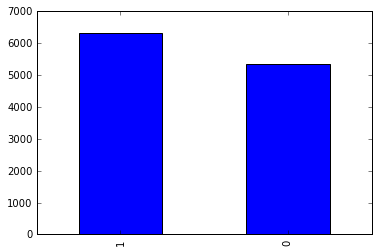

In [11]:
# Getting prediction
predicted_sentiments = svm.predict(cv.transform(status_updates))

pos_status = 0
neg_status = 0

for ps in predicted_sentiments:
    if ps:
        pos_status += 1
    else:
        neg_status += 1
        
# Printing out number of positive and negative status updates
print("Positive :{0}\nNegative :{1}".format(pos_status, neg_status))

# Making a DataFrame
data = {
    'Sentiment' : pd.Series(predicted_sentiments),
    'Text' : pd.Series(status_updates)
}

dt_df = pd.DataFrame(data)

# Swapping the columns
dt_df['Sentiment'], dt_df['Text'] = dt_df['Text'], dt_df['Sentiment']

# Restoring the titles
dt_df.columns = ['Text', 'Sentiment']

# To view full text
pd.set_option('display.max_colwidth', -1)

# Printing the dataframe
print(dt_df.head(5))

# Some data viz
df.Sentiment.value_counts().plot(kind='bar')

# Test Train accuracy dependency over Test-Train split

In [12]:
accuracy_on_train = []
accuracy_on_test = []
test_train_split = []

for i in range(1, 10):
    splt = i / 10
    test_train_split.append(splt)
    Tr, Te = load_train_test(df, splt)
    
    from sklearn.svm import LinearSVC
    svm = LinearSVC()
    
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer()

    X_train = Tr[0]
    y_train = Tr[1]
    X_test = Te[0]
    y_test = Te[1]

    cv.fit(X_train)
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)
    from sklearn.svm import LinearSVC
    svm = LinearSVC()
    svm.fit(X_train, y_train)
    accuracy_on_train.append(svm.score(X_train, y_train))
    accuracy_on_test.append(svm.score(X_test, y_test))
    print("Iteration {0}".format(i))
    

X_train length: 1166
 y_train length: 1166
 X_test_length: 10496
 y_test_length: 10496

Iteration 1
X_train length: 2332
 y_train length: 2332
 X_test_length: 9330
 y_test_length: 9330

Iteration 2
X_train length: 3498
 y_train length: 3498
 X_test_length: 8164
 y_test_length: 8164

Iteration 3
X_train length: 4664
 y_train length: 4664
 X_test_length: 6998
 y_test_length: 6998

Iteration 4
X_train length: 5831
 y_train length: 5831
 X_test_length: 5831
 y_test_length: 5831

Iteration 5
X_train length: 6997
 y_train length: 6997
 X_test_length: 4665
 y_test_length: 4665

Iteration 6
X_train length: 8163
 y_train length: 8163
 X_test_length: 3499
 y_test_length: 3499

Iteration 7
X_train length: 9329
 y_train length: 9329
 X_test_length: 2333
 y_test_length: 2333

Iteration 8
X_train length: 10495
 y_train length: 10495
 X_test_length: 1167
 y_test_length: 1167

Iteration 9


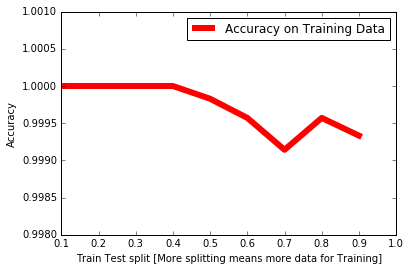

In [13]:
# Accuracy on Training set
plt.plot(test_train_split, accuracy_on_train, '-', linewidth='6', color='red', label='Accuracy on Training Data')
plt.legend()
plt.ylim([0.998, 1.001])
plt.xlabel('Train Test split [More splitting means more data for Training]')
plt.ylabel('Accuracy')
plt.show()

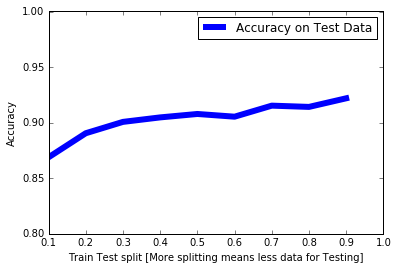

In [14]:
# Accuracy on Testing set
plt.plot(test_train_split, accuracy_on_test, '-', linewidth='6', color='blue', label='Accuracy on Test Data')
plt.legend()
plt.ylim([.8, 1.001])
plt.xlabel('Train Test split [More splitting means less data for Testing]')
plt.ylabel('Accuracy')
plt.show()